<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To Grant or Not to Grant</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Data Mining Project 2025/2026</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 61:</center></div>
   <div><center> Eden da Silva | 20240740 </center></div>


In [195]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import torch
import torch.nn as nn
import torch.optim as optim
import streamlit as st
import plotly.express as px
import math
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
from torch.utils.data import DataLoader, TensorDataset
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# data partition
from sklearn.model_selection import train_test_split


#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.mixture import GaussianMixture

# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
Customer = pd.read_csv('DM_AIAI_CustomerDB.csv',low_memory=False)
Flights = pd.read_csv('DM_AIAI_FlightsDB.csv',low_memory=False)



In [3]:
Customer.shape

(16921, 21)

In [4]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [5]:
Customer.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [6]:
Customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In [7]:
# Check for number of missing values
print('Amount of missing values per column \n',Customer.isna().sum())
print('\n Percentage of missing values per column \n',(Customer.isna().sum()/len(Customer))*100)


Amount of missing values per column 
 Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

 Percentage of missing values per column 
 Unnamed: 0                  0.000000
Loyalty#                    0.000000
First Name                  0.000000
Last Name                   0.000000
Customer Name               0.000000
Country                    

In [8]:
Flights.shape

(608436, 10)

In [9]:
Flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [9]:
Flights.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [10]:
Flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,550037.873084,258935.180575,100018.0,326961.00,550834.000,772194.0000,999986.0
Year,608436.0,2020.000000,0.816497,2019.0,2019.00,2020.000,2021.0000,2021.0
Month,608436.0,6.500000,3.452055,1.0,3.75,6.500,9.2500,12.0
NumFlights,608436.0,3.908107,5.057889,0.0,0.00,0.000,7.2000,21.0
NumFlightsWithCompanions,608436.0,0.983944,2.003785,0.0,0.00,0.000,0.9000,11.0
DistanceKM,608436.0,7939.341419,10260.421873,0.0,0.00,856.400,15338.1750,42040.0
PointsAccumulated,608436.0,793.777781,1025.918521,0.0,0.00,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,235.251678,983.233374,0.0,0.00,0.000,0.0000,7496.0
DollarCostPointsRedeemed,608436.0,2.324835,9.725168,0.0,0.00,0.000,0.0000,74.0


In [11]:
print('Amount of missing values per column \n',Flights.isna().sum())
print('\n Percentage of missing values per column \n',(Flights.isna().sum()/len(Flights))*100)

Amount of missing values per column 
 Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

 Percentage of missing values per column 
 Loyalty#                    0.0
Year                        0.0
Month                       0.0
YearMonthDate               0.0
NumFlights                  0.0
NumFlightsWithCompanions    0.0
DistanceKM                  0.0
PointsAccumulated           0.0
PointsRedeemed              0.0
DollarCostPointsRedeemed    0.0
dtype: float64


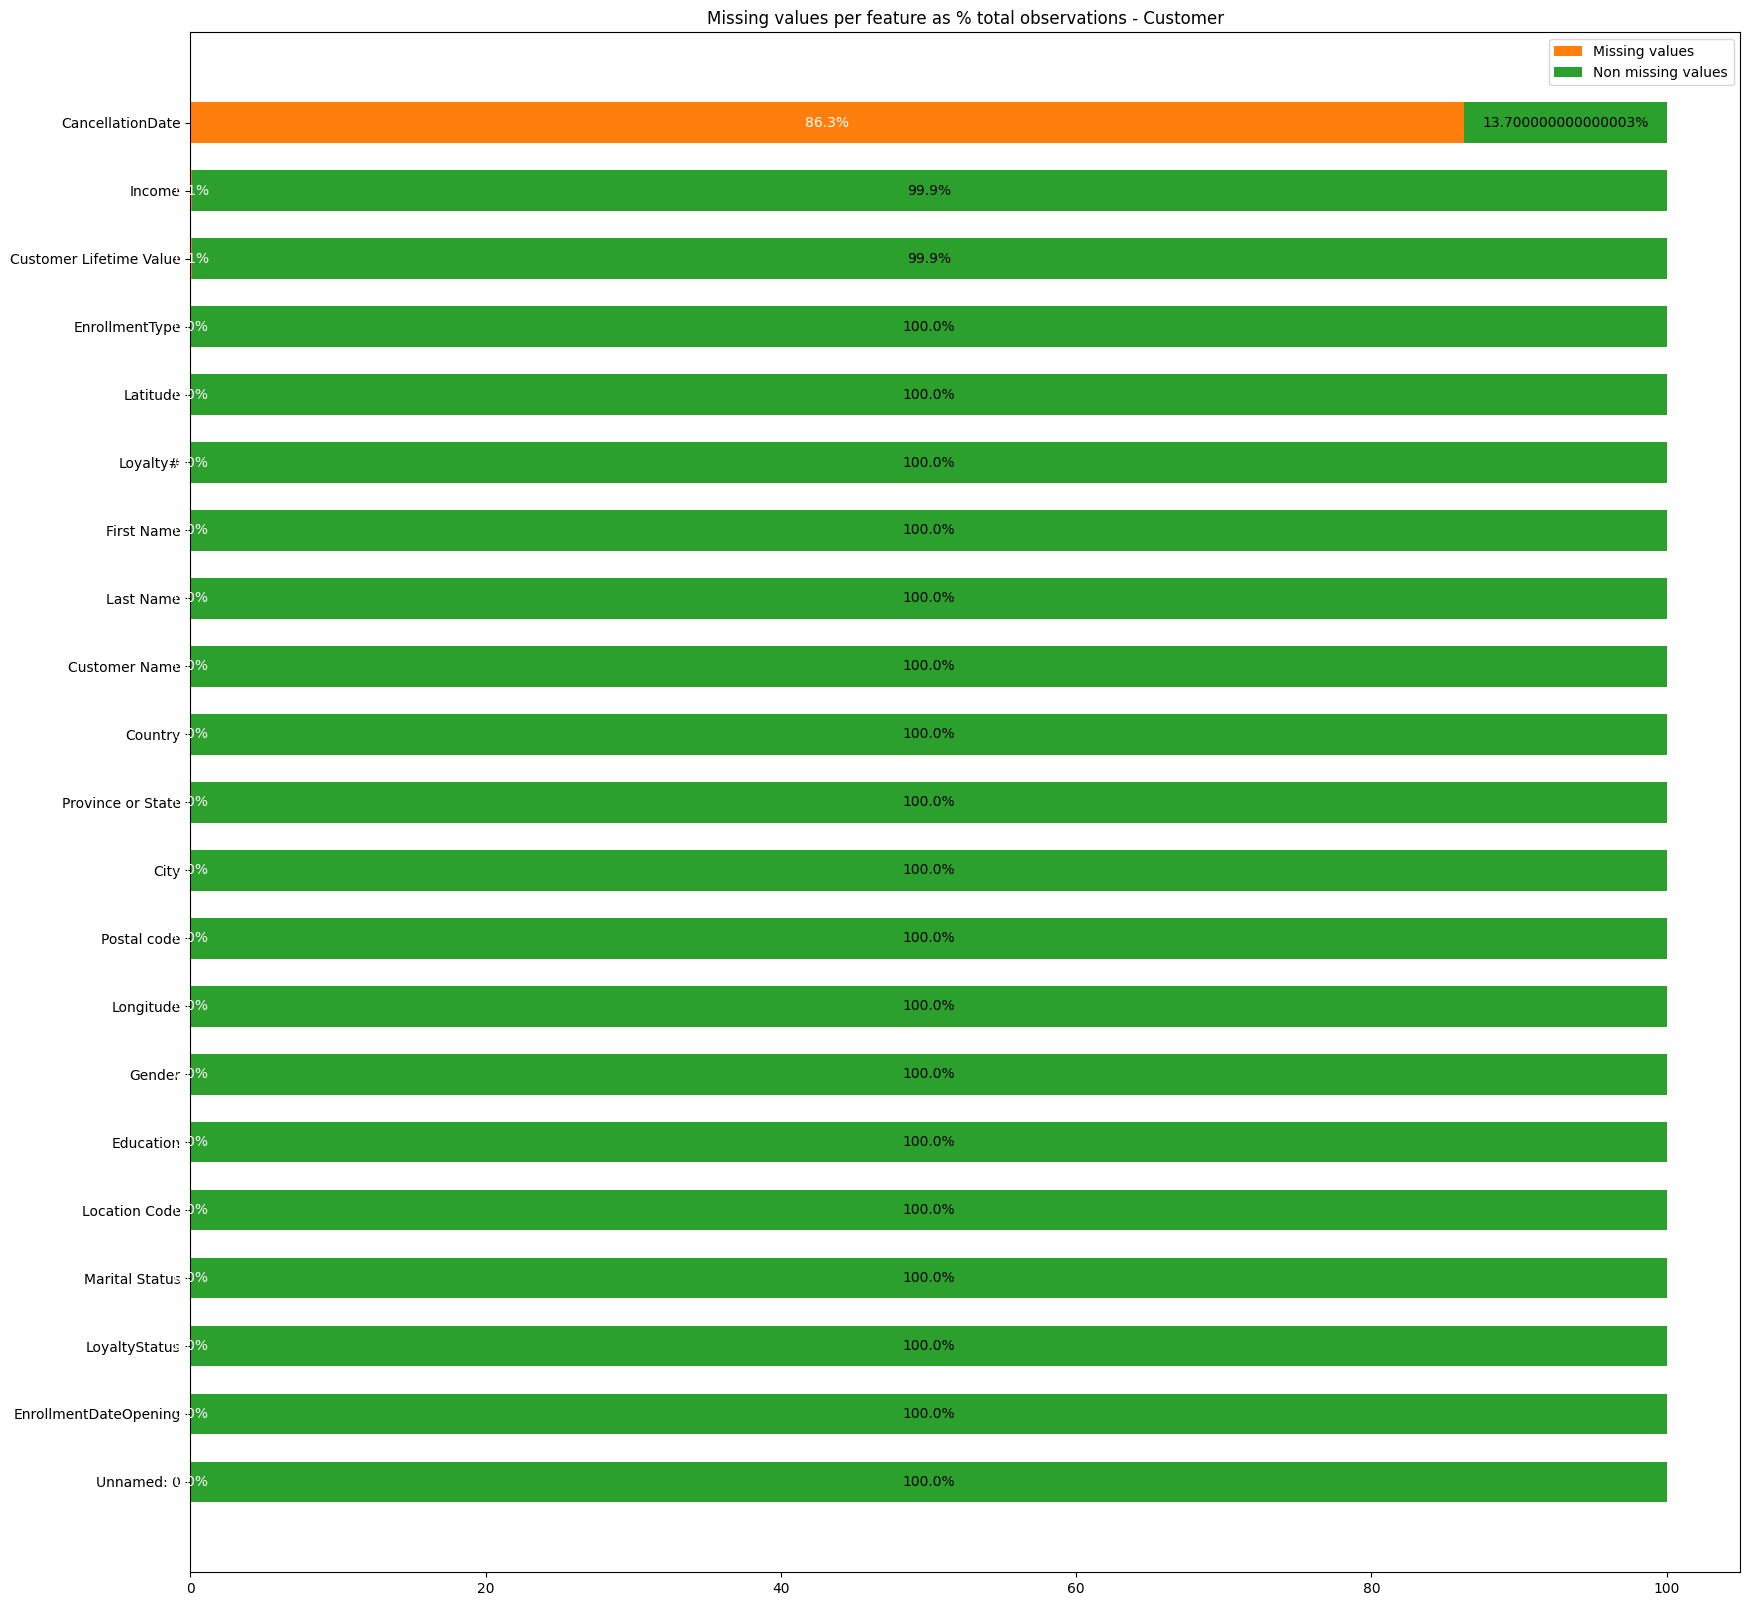

In [12]:
#missing values visualization
percentage_missing = round((Customer.isnull().sum() / Customer.shape[0])*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Customer")
plt.show()

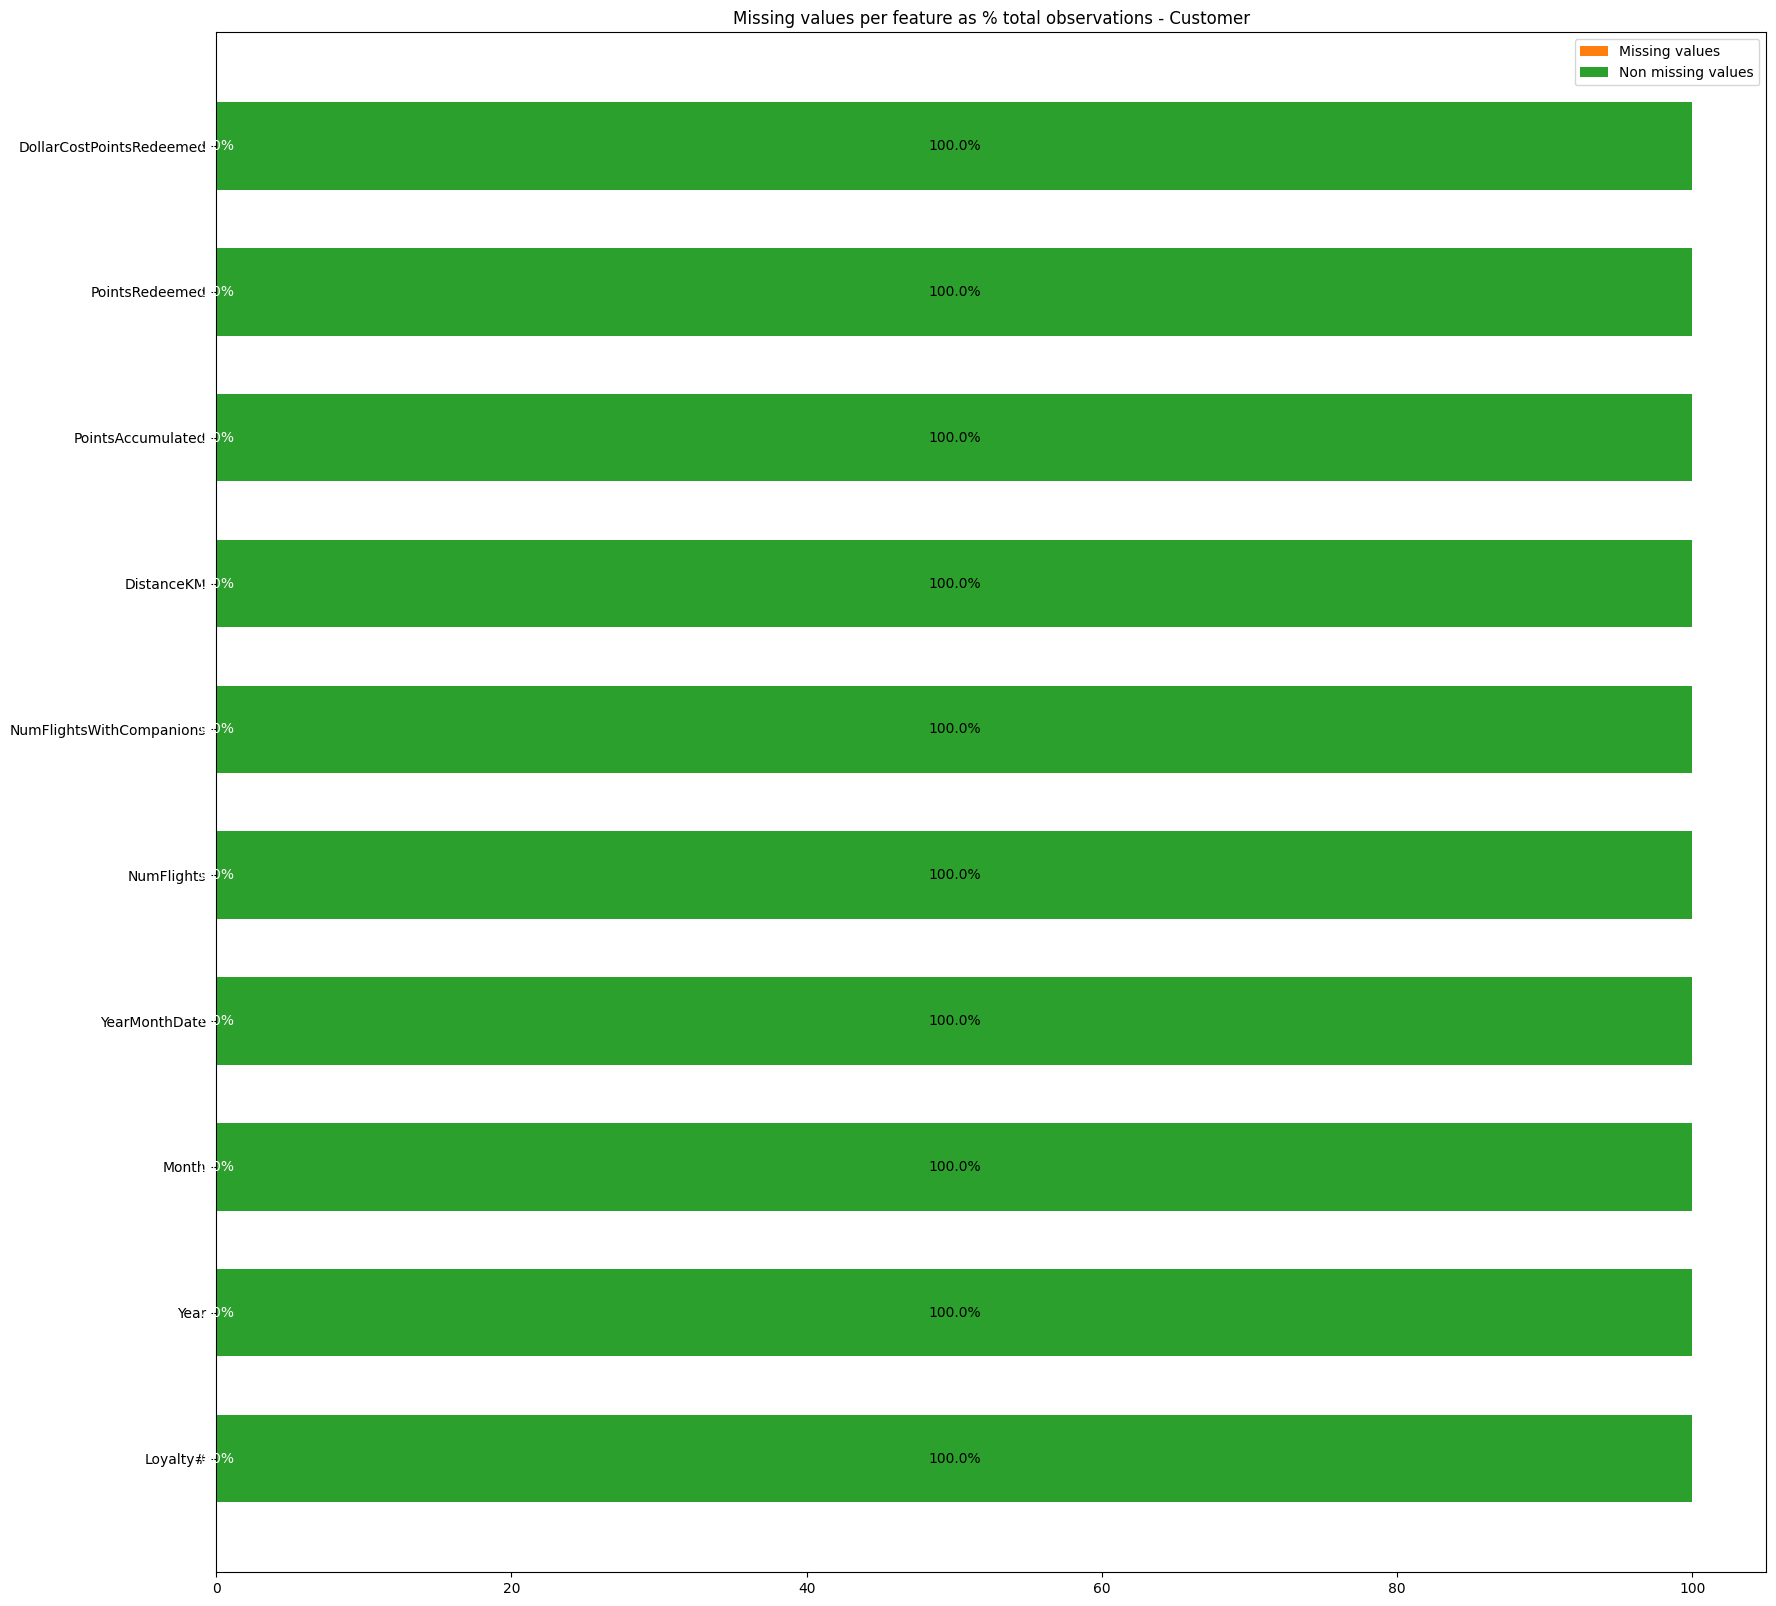

In [13]:
#missing values visualization
percentage_missing = round((Flights.isnull().sum() / Flights.shape[0])*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations - Customer")
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:16px" id="ifa">
    
# 1.2. Individual Feature Analysis
- In this step, we will examine each feature separately to detect outliers, missing data, or any unusual values 
    
</a>

In [14]:
# Creating a copy of the dataframe so we dont lose any information
Customer_eda = Customer.copy()


In [15]:

Customer_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [16]:

Customer_eda['Unnamed: 0'].nunique(), Customer_eda.shape[0]

(16901, 16921)

In [17]:
Customer_eda['Unnamed: 0'].describe()

count    16921.000000
mean      8440.023639
std       4884.775439
min          0.000000
25%       4210.000000
50%       8440.000000
75%      12670.000000
max      16900.000000
Name: Unnamed: 0, dtype: float64

In [18]:
print('There are', Customer_eda['Unnamed: 0'].isna().sum(), 'outliers in the train data.')
print('This represents %',(Customer_eda['Unnamed: 0'].isna().sum())/len(Customer_eda), 'of the data')

There are 0 outliers in the train data.
This represents % 0.0 of the data


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.2. Loyalty#

    
</a>

In [19]:

Customer_eda['Loyalty#'].nunique(), Customer_eda.shape[0]

(16757, 16921)

In [20]:
Customer_eda['Loyalty#'].describe()

count     16921.000000
mean     550197.393771
std      259251.503597
min      100011.000000
25%      326823.000000
50%      550896.000000
75%      772438.000000
max      999999.000000
Name: Loyalty#, dtype: float64

In [21]:
print('There are', Customer_eda['Loyalty#'].isna().sum(), 'outliers in the train data.')
print('This represents %',(Customer_eda['Loyalty#'].isna().sum())/len(Customer_eda), 'of the data')

There are 0 outliers in the train data.
This represents % 0.0 of the data


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.3. Customer First Name, Last Name and Customer Name

    
</a>

In [22]:
Customer_eda['First Name'].describe()


count     16921
unique     4941
top        Deon
freq         13
Name: First Name, dtype: object

In [23]:
Customer_eda['Last Name'].describe() 

count       16921
unique      15404
top       Salberg
freq            4
Name: Last Name, dtype: object

In [24]:
Customer_eda['Customer Name'].describe() 

count                   16921
unique                  16921
top       Cecilia Householder
freq                        1
Name: Customer Name, dtype: object

In [25]:
Customer_eda[['First Name', 'Last Name', 'Customer Name']].isna().sum()



First Name       0
Last Name        0
Customer Name    0
dtype: int64

In [26]:
(Customer_eda['Customer Name'] == (Customer_eda['First Name'] + ' ' + Customer_eda['Last Name'])).all()


True

In [27]:
Customer_eda['First Name'].value_counts().head(10)
Customer_eda['Last Name'].value_counts().head(10)


Last Name
Salberg       4
Ypina         4
Amodei        3
Mesteth       3
Sather        3
Kot           3
Bubb          3
Musquiz       3
Tousignant    3
Tash          3
Name: count, dtype: int64

In [28]:
Customer_eda['First Name'].str.len().describe()


count    16921.000000
mean         5.945393
std          1.527284
min          2.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: First Name, dtype: float64

In [29]:
Customer_eda['Customer Name'].str.len().describe()


count    16921.000000
mean        13.779387
std          2.321136
min          7.000000
25%         12.000000
50%         14.000000
75%         15.000000
max         23.000000
Name: Customer Name, dtype: float64

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.4. Country, Province or State and City

    
</a>

In [30]:

Customer_eda['Country'].describe()


count      16921
unique         1
top       Canada
freq       16921
Name: Country, dtype: object

In [31]:
Customer_eda['City'].describe()


count       16921
unique         29
top       Toronto
freq         3390
Name: City, dtype: object

In [32]:
Customer_eda['City'].value_counts().head(10)

City
Toronto        3390
Vancouver      2600
Montreal       2065
Winnipeg        676
Whistler        586
Halifax         541
Ottawa          518
Edmonton        512
Trenton         491
Quebec City     484
Name: count, dtype: int64

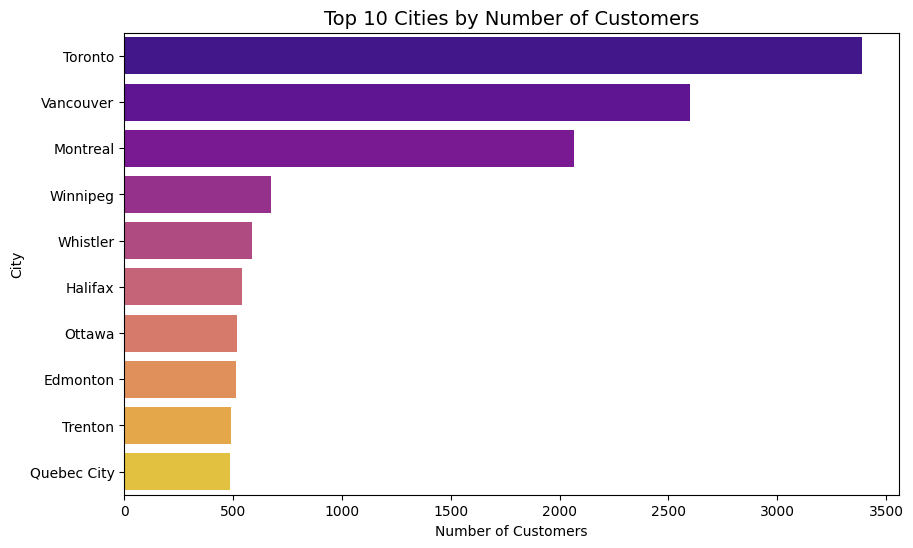

In [33]:
top_cities = Customer_eda['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 10 Cities by Number of Customers', fontsize=14)
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()


In [34]:
Customer_eda['Province or State'].describe()

count       16921
unique         11
top       Ontario
freq         5468
Name: Province or State, dtype: object

In [35]:
Customer_eda['Province or State'].value_counts().head(10)

Province or State
Ontario             5468
British Columbia    4416
Quebec              3311
Alberta             1008
Manitoba             676
New Brunswick        652
Nova Scotia          541
Saskatchewan         412
Newfoundland         258
Yukon                112
Name: count, dtype: int64

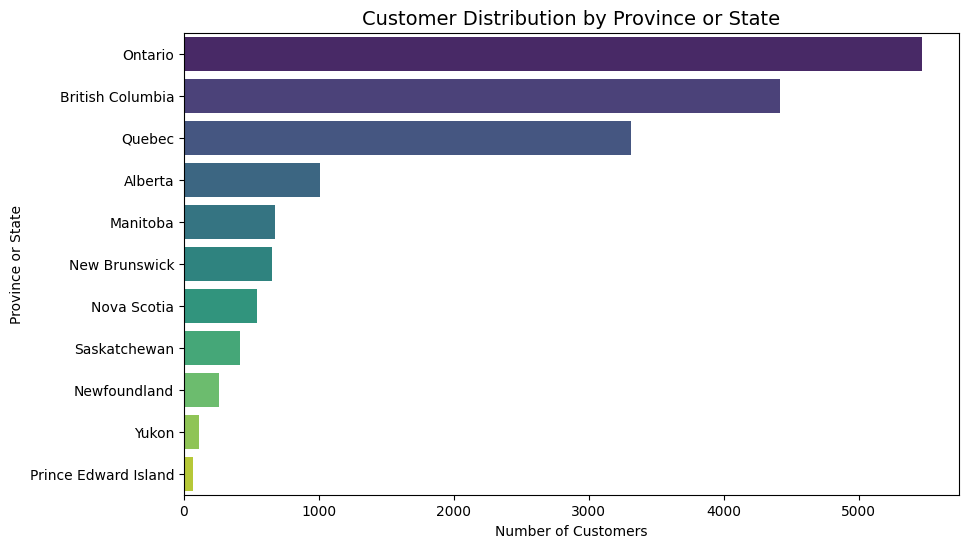

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(y='Province or State', data=Customer_eda, order=Customer_eda['Province or State'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Province or State', fontsize=14)
plt.xlabel('Number of Customers')
plt.ylabel('Province or State')
plt.show()


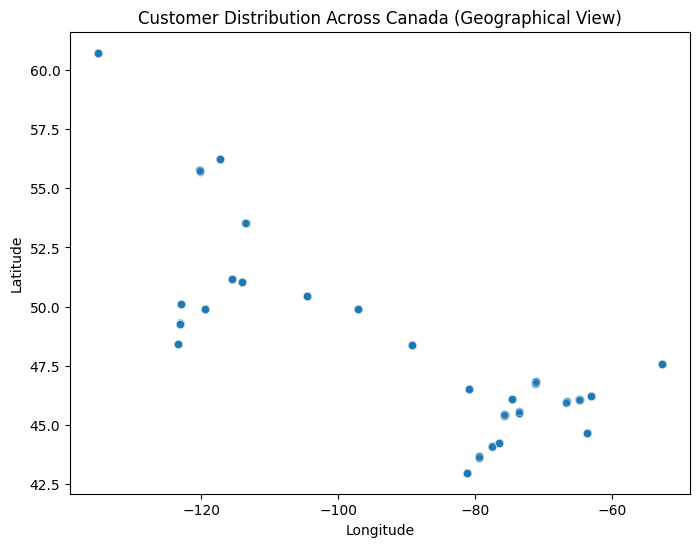

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=Customer_eda, alpha=0.5)
plt.title('Customer Distribution Across Canada (Geographical View)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.5. Gender

    
</a>

In [38]:
Customer_eda['Gender'].isna().sum()

0

In [39]:
Customer_eda['Gender'].value_counts()

Gender
female    8497
male      8424
Name: count, dtype: int64

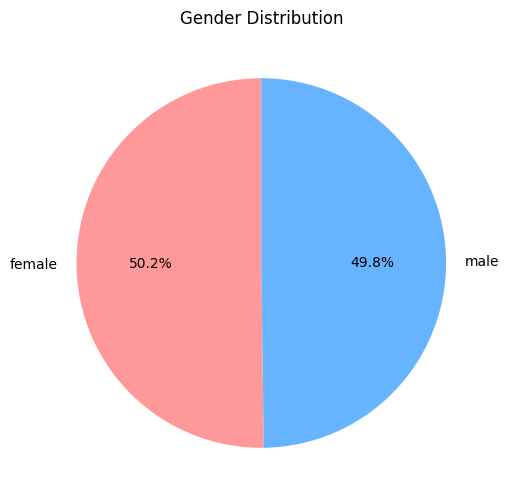

In [40]:
gender_counts = Customer_eda['Gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title('Gender Distribution')
plt.show()


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.6. Education

    
</a>

In [41]:
Customer_eda['Education'].isna().sum()  

0

In [42]:
Customer_eda['Education'].describe()

count        16921
unique           5
top       Bachelor
freq         10586
Name: Education, dtype: object

In [43]:
Customer_eda['Education'].value_counts()

Education
Bachelor                10586
College                  4283
High School or Below      792
Doctor                    742
Master                    518
Name: count, dtype: int64

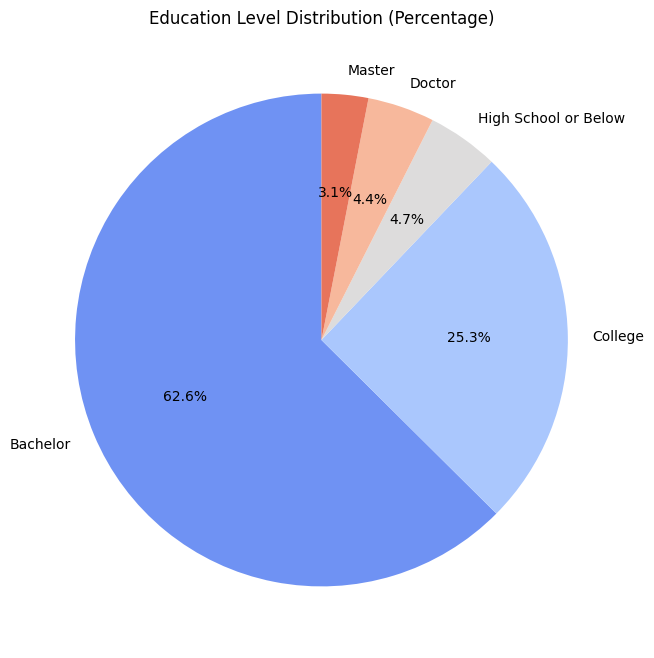

In [44]:
edu_counts = Customer_eda['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    edu_counts,
    labels=edu_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm', n_colors=len(edu_counts))
)
plt.title('Education Level Distribution (Percentage)')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.7. Location Code

    
</a>

In [45]:
Customer_eda['Location Code'].describe()

count        16921
unique           3
top       Suburban
freq          5716
Name: Location Code, dtype: object

In [46]:
Customer_eda['Location Code'].value_counts()

Location Code
Suburban    5716
Rural       5668
Urban       5537
Name: count, dtype: int64

In [47]:
Customer_eda['Location Code'].isna().sum()

0

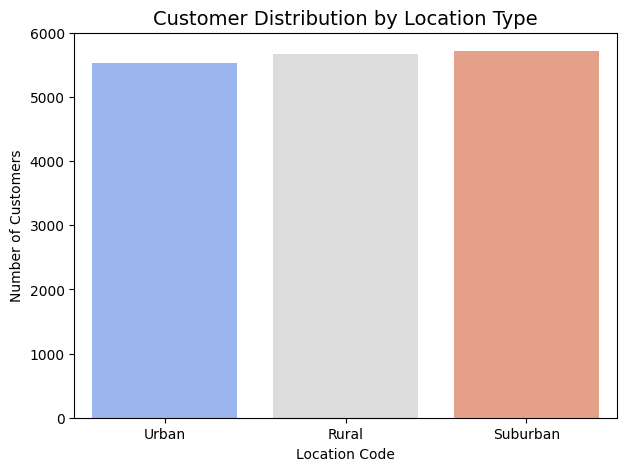

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x='Location Code', data=Customer_eda, palette='coolwarm')
plt.title('Customer Distribution by Location Type', fontsize=14)
plt.xlabel('Location Code')
plt.ylabel('Number of Customers')
plt.show()


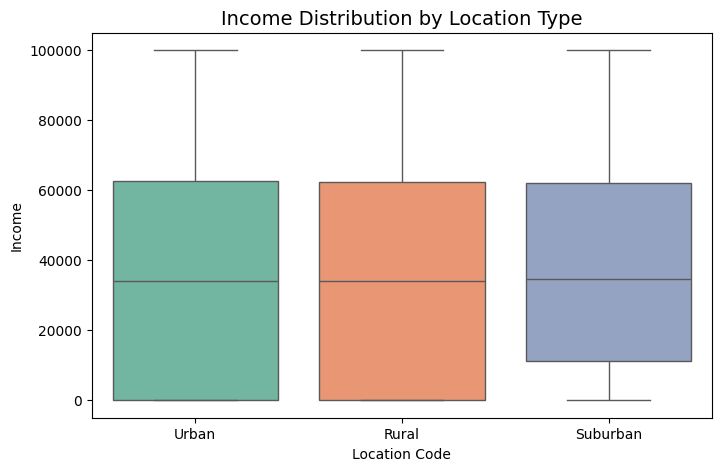

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Location Code', y='Income', data=Customer_eda, palette='Set2')
plt.title('Income Distribution by Location Type', fontsize=14)
plt.xlabel('Location Code')
plt.ylabel('Income')
plt.show()


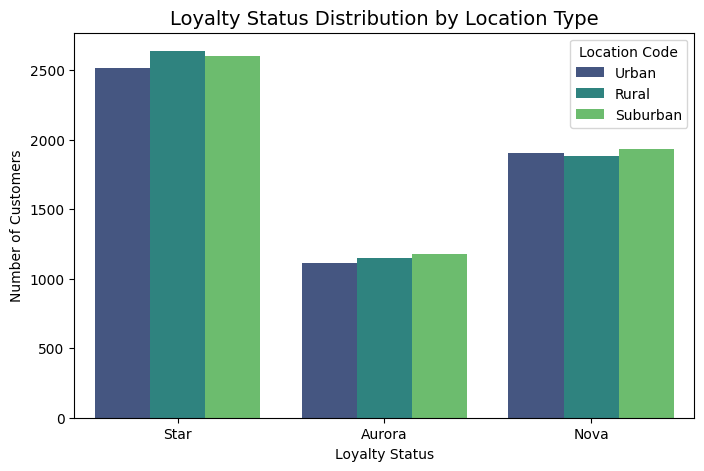

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='LoyaltyStatus', hue='Location Code', data=Customer_eda, palette='viridis')
plt.title('Loyalty Status Distribution by Location Type', fontsize=14)
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Customers')
plt.legend(title='Location Code')
plt.show()


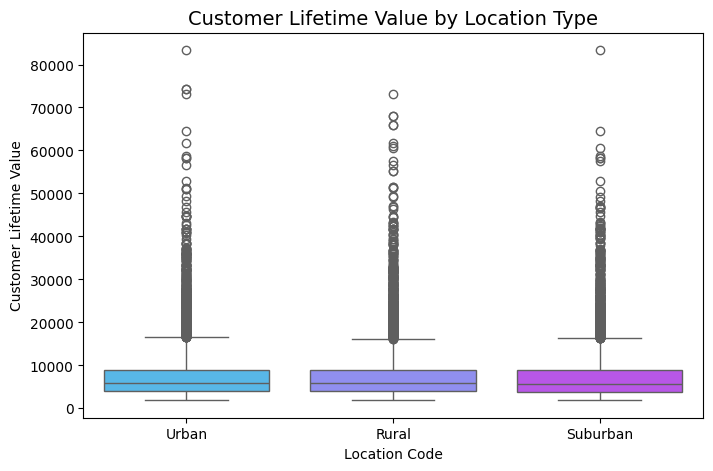

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Location Code', y='Customer Lifetime Value', data=Customer_eda, palette='cool')
plt.title('Customer Lifetime Value by Location Type', fontsize=14)
plt.xlabel('Location Code')
plt.ylabel('Customer Lifetime Value')
plt.show()


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.8. Income

    
</a>

In [52]:
print("Income: Missing =", Customer_eda['Income'].isna().sum())
print(Customer_eda['Income'].describe())

Income: Missing = 20
count    16901.000000
mean     37758.038400
std      30368.992499
min          0.000000
25%          0.000000
50%      34161.000000
75%      62396.000000
max      99981.000000
Name: Income, dtype: float64


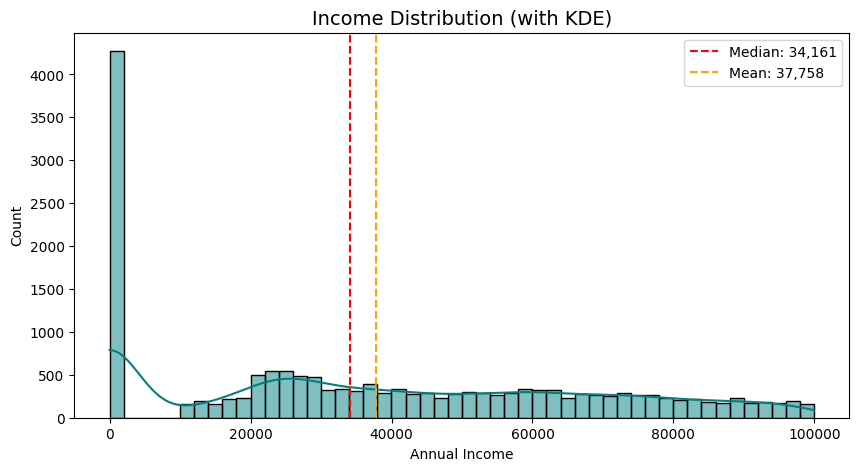

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(Customer_eda['Income'].dropna(), bins=50, kde=True, color='teal')
plt.title('Income Distribution (with KDE)', fontsize=14)
plt.xlabel('Annual Income')
plt.axvline(Customer_eda['Income'].median(), color='red', linestyle='--', label=f"Median: {Customer_eda['Income'].median():,.0f}")
plt.axvline(Customer_eda['Income'].mean(), color='orange', linestyle='--', label=f"Mean: {Customer_eda['Income'].mean():,.0f}")
plt.legend()
plt.show()

In [54]:
income_stats = Customer_eda['Income'].describe().round(2)
print("Income Summary:\n", income_stats)


Income Summary:
 count    16901.00
mean     37758.04
std      30368.99
min          0.00
25%          0.00
50%      34161.00
75%      62396.00
max      99981.00
Name: Income, dtype: float64


In [55]:
mean_income = Customer_eda['Income'].mean().round(2)
median_income = Customer_eda['Income'].median().round(2)
min_income = Customer_eda['Income'].min()
max_income = Customer_eda['Income'].max()

print(f"Mean Income: {mean_income:,.2f}")
print(f"Median Income: {median_income:,.2f}")
print(f"Min Income: {min_income:,.2f}")
print(f"Max Income: {max_income:,.2f}")


Mean Income: 37,758.04
Median Income: 34,161.00
Min Income: 0.00
Max Income: 99,981.00


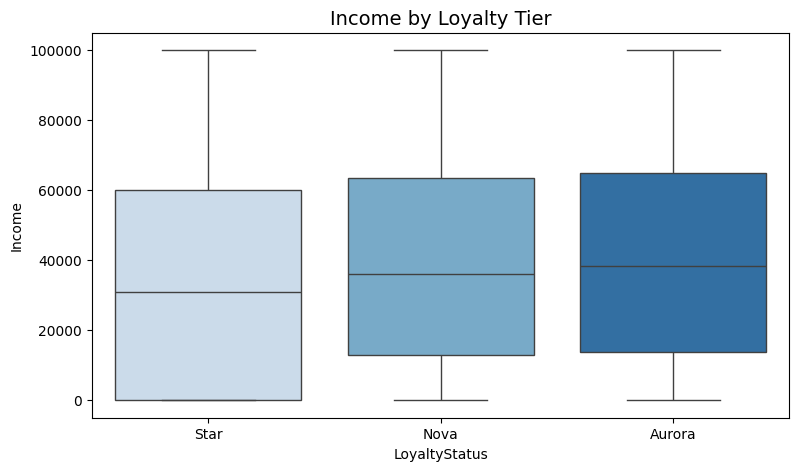

In [56]:
plt.figure(figsize=(9,5))
sns.boxplot(x='LoyaltyStatus', y='Income', data=Customer_eda, order=['Star', 'Nova', 'Aurora'], palette='Blues')
plt.title('Income by Loyalty Tier', fontsize=14)
plt.ylabel('Income')
plt.show()

In [57]:
income_by_loyalty = (
    Customer_eda.groupby('LoyaltyStatus')['Income']
    .describe()
    .round(2)
)
print("Income Summary by LoyaltyStatus:\n", income_by_loyalty)


Income Summary by LoyaltyStatus:
                 count      mean       std  min      25%      50%       75%  \
LoyaltyStatus                                                                
Aurora         3438.0  40207.37  30519.64  0.0  13879.5  38433.5  65014.25   
Nova           5722.0  38934.27  30245.28  0.0  12964.0  36091.0  63471.75   
Star           7741.0  35800.77  30273.17  0.0      0.0  30817.0  60087.00   

                   max  
LoyaltyStatus           
Aurora         99960.0  
Nova           99981.0  
Star           99961.0  


In [58]:
income_summary = Customer_eda.groupby('LoyaltyStatus')['Income'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2)

print(income_summary)


               count      mean   median  min      max
LoyaltyStatus                                        
Aurora          3438  40207.37  38433.5  0.0  99960.0
Nova            5722  38934.27  36091.0  0.0  99981.0
Star            7741  35800.77  30817.0  0.0  99961.0


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.9. Marital Status

    
</a>

In [59]:
print(Customer_eda['Marital Status'].value_counts())

Marital Status
Married     9842
Single      4539
Divorced    2540
Name: count, dtype: int64


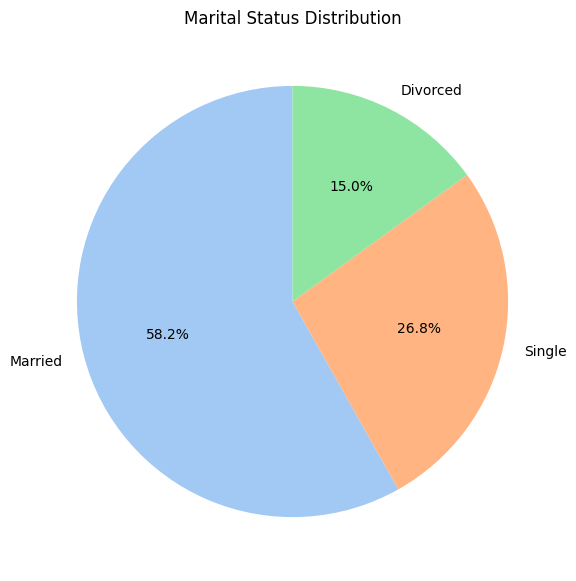

In [60]:
# Pie chart
marital_counts = Customer_eda['Marital Status'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Marital Status Distribution')
plt.show()

In [61]:
Customer_eda['Marital Status'].value_counts()

Marital Status
Married     9842
Single      4539
Divorced    2540
Name: count, dtype: int64

<Figure size 900x500 with 0 Axes>

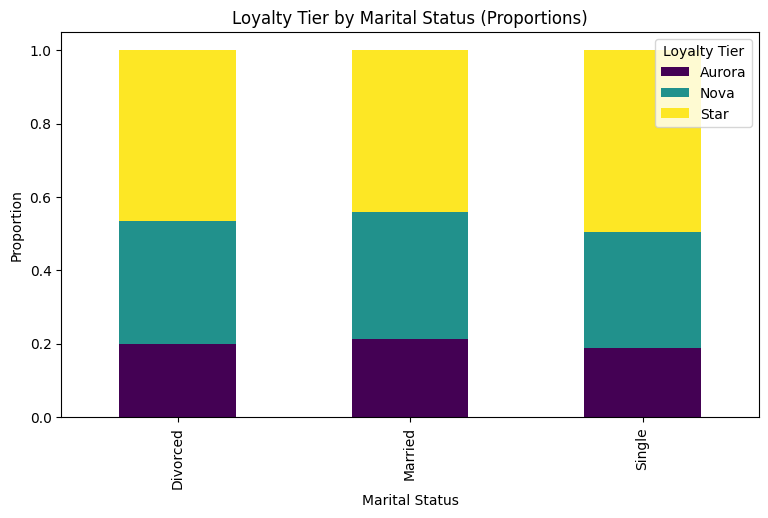

In [62]:
# Stacked bar: Marital Status vs Loyalty Tier
plt.figure(figsize=(9,5))
marital_loyalty = pd.crosstab(Customer_eda['Marital Status'], Customer_eda['LoyaltyStatus'], normalize='index')
marital_loyalty.plot(kind='bar', stacked=True, colormap='viridis', figsize=(9,5))
plt.title('Loyalty Tier by Marital Status (Proportions)')
plt.ylabel('Proportion')
plt.legend(title='Loyalty Tier')
plt.show()

In [63]:
marital_loyalty_counts = pd.crosstab(
    Customer_eda['Marital Status'],
    Customer_eda['LoyaltyStatus']
)
print("Counts of LoyaltyStatus by Marital Status:\n")
print(marital_loyalty_counts)


Counts of LoyaltyStatus by Marital Status:

LoyaltyStatus   Aurora  Nova  Star
Marital Status                    
Divorced           504   854  1182
Married           2087  3423  4332
Single             847  1445  2247


In [64]:
marital_loyalty_props = pd.crosstab(
    Customer_eda['Marital Status'],
    Customer_eda['LoyaltyStatus'],
    normalize='index'
).round(3)

print("Proportion of LoyaltyStatus by Marital Status:\n")
print(marital_loyalty_props)


Proportion of LoyaltyStatus by Marital Status:

LoyaltyStatus   Aurora   Nova   Star
Marital Status                      
Divorced         0.198  0.336  0.465
Married          0.212  0.348  0.440
Single           0.187  0.318  0.495


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.10. LoyaltyStatus 

    
</a>

In [65]:
print(Customer_eda['LoyaltyStatus'].value_counts())

LoyaltyStatus
Star      7761
Nova      5722
Aurora    3438
Name: count, dtype: int64


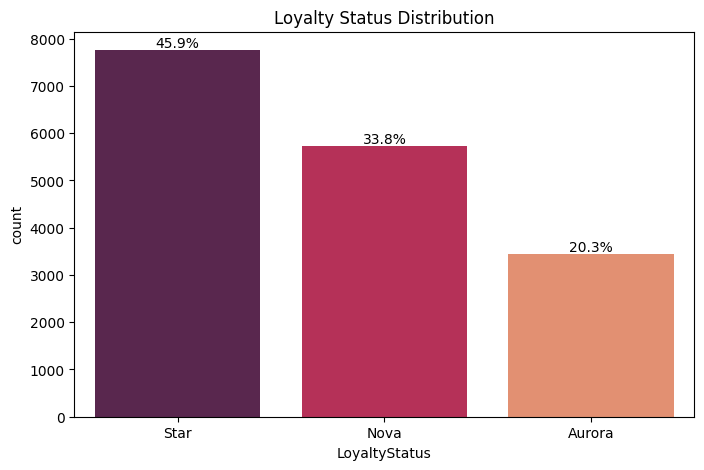

In [66]:
# Count plot with percentages
plt.figure(figsize=(8,5))
ax = sns.countplot(x='LoyaltyStatus', data=Customer_eda, order=['Star', 'Nova', 'Aurora'], palette='rocket')
total = len(Customer_eda)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.title('Loyalty Status Distribution')
plt.show()

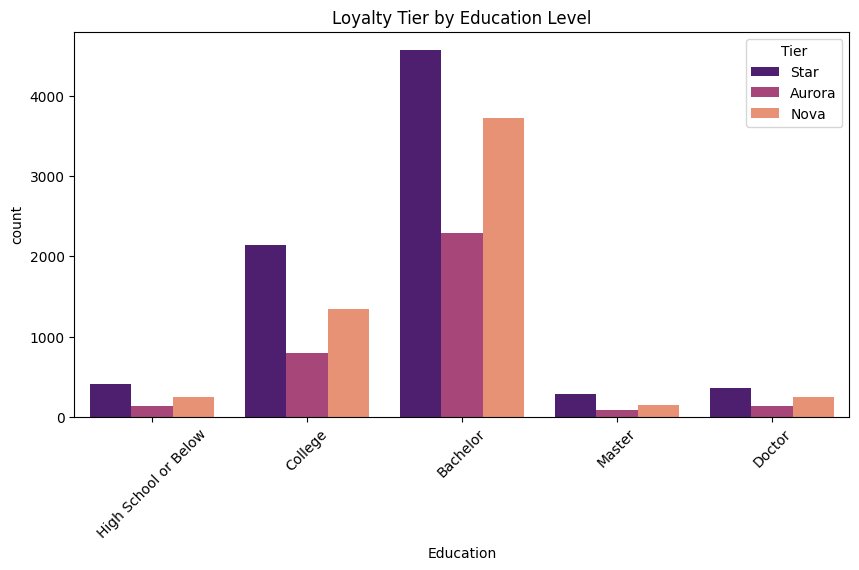

In [67]:
# Loyalty vs Education
plt.figure(figsize=(10,5))
sns.countplot(x='Education', hue='LoyaltyStatus', data=Customer_eda, 
              order=['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'], palette='magma')
plt.title('Loyalty Tier by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Tier')
plt.show()

In [68]:
loyalty_edu_counts = pd.crosstab(
    Customer_eda['Education'],
    Customer_eda['LoyaltyStatus']
)
print("Counts of LoyaltyStatus by Education Level:\n")
print(loyalty_edu_counts)


Counts of LoyaltyStatus by Education Level:

LoyaltyStatus         Aurora  Nova  Star
Education                               
Bachelor                2292  3723  4571
College                  795  1345  2143
Doctor                   135   251   356
High School or Below     137   250   405
Master                    79   153   286


In [69]:
loyalty_edu_props = pd.crosstab(
    Customer_eda['Education'],
    Customer_eda['LoyaltyStatus'],
    normalize='index'
).round(3)

print("Proportion of LoyaltyStatus by Education Level:\n")
print(loyalty_edu_props)


Proportion of LoyaltyStatus by Education Level:

LoyaltyStatus         Aurora   Nova   Star
Education                                 
Bachelor               0.217  0.352  0.432
College                0.186  0.314  0.500
Doctor                 0.182  0.338  0.480
High School or Below   0.173  0.316  0.511
Master                 0.153  0.295  0.552


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.11. EnrollmentDateOpening

    
</a>

In [70]:
Customer_eda['EnrollmentDateOpening'] = pd.to_datetime(Customer_eda['EnrollmentDateOpening'])

In [71]:
Customer_eda['EnrollmentYear'] = Customer_eda['EnrollmentDateOpening'].dt.year
Customer_eda['EnrollmentMonth'] = Customer_eda['EnrollmentDateOpening'].dt.month


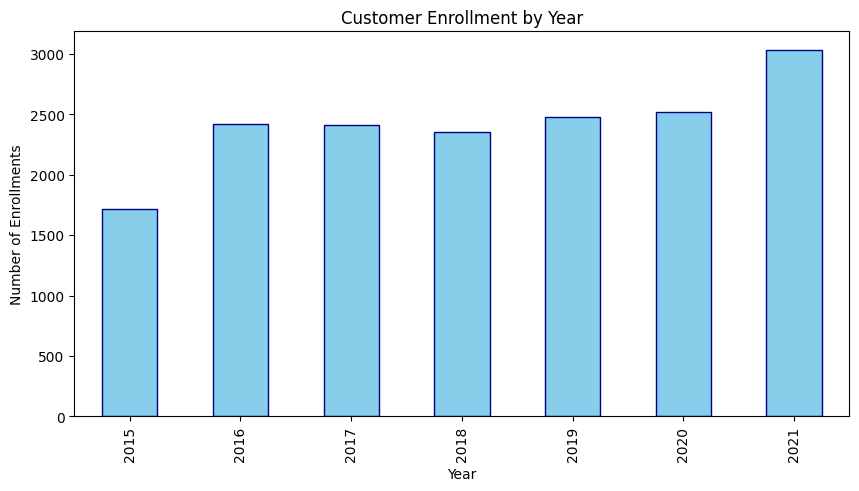

In [72]:
# Enrollment trend
enroll_by_year = Customer_eda['EnrollmentYear'].value_counts().sort_index()
plt.figure(figsize=(10,5))
enroll_by_year.plot(kind='bar', color='skyblue', edgecolor='navy')
plt.title('Customer Enrollment by Year')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.show()

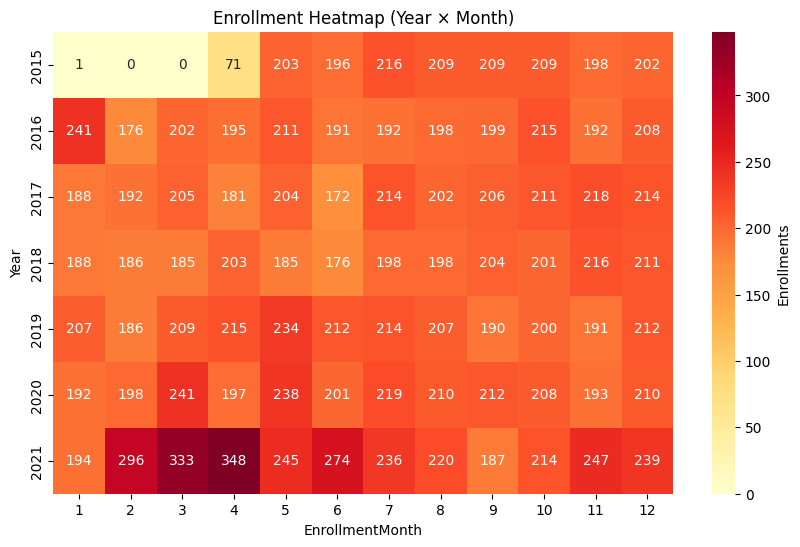

In [73]:
# Heatmap: Enrollment by Year-Month
enroll_pivot = Customer_eda.groupby(['EnrollmentYear', 'EnrollmentMonth']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(enroll_pivot, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Enrollments'})
plt.title('Enrollment Heatmap (Year × Month)')
plt.ylabel('Year')
plt.show()

In [74]:
enroll_pivot = (
    Customer_eda
    .groupby(['EnrollmentYear', 'EnrollmentMonth'])
    .size()
    .unstack(fill_value=0)
)
print("Enrollment Counts by Year and Month:\n")
print(enroll_pivot)


Enrollment Counts by Year and Month:

EnrollmentMonth   1    2    3    4    5    6    7    8    9    10   11   12
EnrollmentYear                                                             
2015               1    0    0   71  203  196  216  209  209  209  198  202
2016             241  176  202  195  211  191  192  198  199  215  192  208
2017             188  192  205  181  204  172  214  202  206  211  218  214
2018             188  186  185  203  185  176  198  198  204  201  216  211
2019             207  186  209  215  234  212  214  207  190  200  191  212
2020             192  198  241  197  238  201  219  210  212  208  193  210
2021             194  296  333  348  245  274  236  220  187  214  247  239


In [75]:
enroll_pivot['Total'] = enroll_pivot.sum(axis=1)
print("Enrollment Counts with Yearly Totals:\n")
print(enroll_pivot)



Enrollment Counts with Yearly Totals:

EnrollmentMonth    1    2    3    4    5    6    7    8    9   10   11   12  \
EnrollmentYear                                                                
2015               1    0    0   71  203  196  216  209  209  209  198  202   
2016             241  176  202  195  211  191  192  198  199  215  192  208   
2017             188  192  205  181  204  172  214  202  206  211  218  214   
2018             188  186  185  203  185  176  198  198  204  201  216  211   
2019             207  186  209  215  234  212  214  207  190  200  191  212   
2020             192  198  241  197  238  201  219  210  212  208  193  210   
2021             194  296  333  348  245  274  236  220  187  214  247  239   

EnrollmentMonth  Total  
EnrollmentYear          
2015              1714  
2016              2420  
2017              2407  
2018              2351  
2019              2477  
2020              2519  
2021              3033  


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.12. CancellationDate

    
</a>

In [76]:
Customer_eda['CancellationDate'] = pd.to_datetime(Customer_eda['CancellationDate'], errors='coerce')
Customer_eda['ChurnFlag'] = Customer_eda['CancellationDate'].notna().astype(int)

print(f"Churn Rate: {Customer_eda['ChurnFlag'].mean():.1%}")

Churn Rate: 13.6%


In [77]:
churn_counts = Customer_eda.groupby('LoyaltyStatus')['ChurnFlag'].agg(
    churned='sum',
    total='count'
)
churn_counts['ChurnRate(%)'] = (churn_counts['churned'] / churn_counts['total'] * 100).round(2)
print("Churn Summary by Loyalty Tier:\n")
print(churn_counts)


Churn Summary by Loyalty Tier:

               churned  total  ChurnRate(%)
LoyaltyStatus                              
Aurora             491   3438         14.28
Nova               797   5722         13.93
Star              1020   7761         13.14


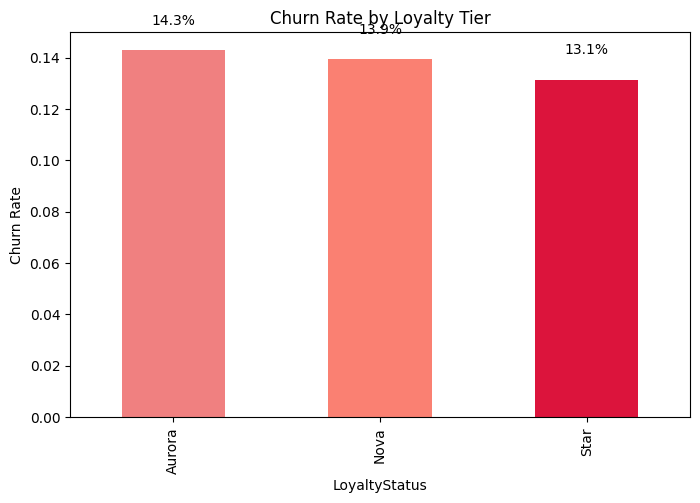

In [78]:
# Churn by Loyalty Tier
churn_by_tier = Customer_eda.groupby('LoyaltyStatus')['ChurnFlag'].mean()
plt.figure(figsize=(8,5))
churn_by_tier.plot(kind='bar', color=['lightcoral', 'salmon', 'crimson'])
plt.title('Churn Rate by Loyalty Tier')
plt.ylabel('Churn Rate')
for i, v in enumerate(churn_by_tier):
    plt.text(i, v + 0.01, f"{v:.1%}", ha='center')
plt.show()

In [79]:
cancel_counts = Customer_eda['ChurnFlag'].value_counts()
print("Customer Cancellation Counts:\n")
print(cancel_counts)


Customer Cancellation Counts:

ChurnFlag
0    14613
1     2308
Name: count, dtype: int64


In [80]:
cancel_counts = Customer_eda.groupby(['LoyaltyStatus', 'ChurnFlag']).size().unstack(fill_value=0)
print(cancel_counts)

ChurnFlag         0     1
LoyaltyStatus            
Aurora         2947   491
Nova           4925   797
Star           6741  1020


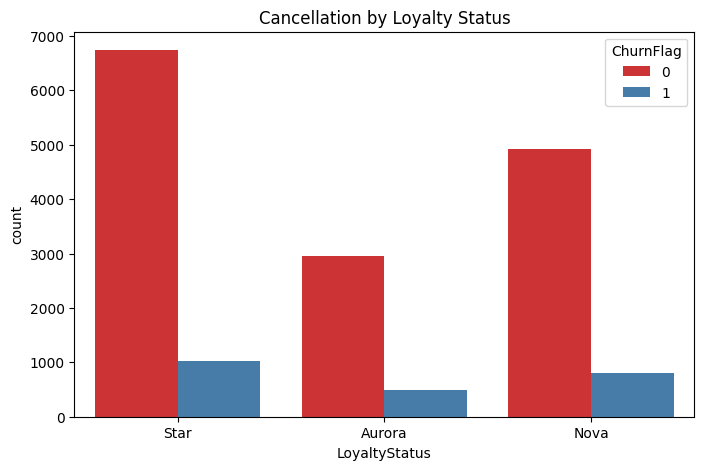

In [81]:
# Cancellation by LoyaltyStatus
plt.figure(figsize=(8,5))
sns.countplot(x='LoyaltyStatus', hue='ChurnFlag', data=Customer_eda, palette='Set1')
plt.title('Cancellation by Loyalty Status')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.13. Customer Lifetime Value

    
</a>

In [82]:
print(Customer_eda['Customer Lifetime Value'].describe())

count    16901.000000
mean      7990.460188
std       6863.173093
min       1898.010000
25%       3979.720000
50%       5780.180000
75%       8945.690000
max      83325.380000
Name: Customer Lifetime Value, dtype: float64


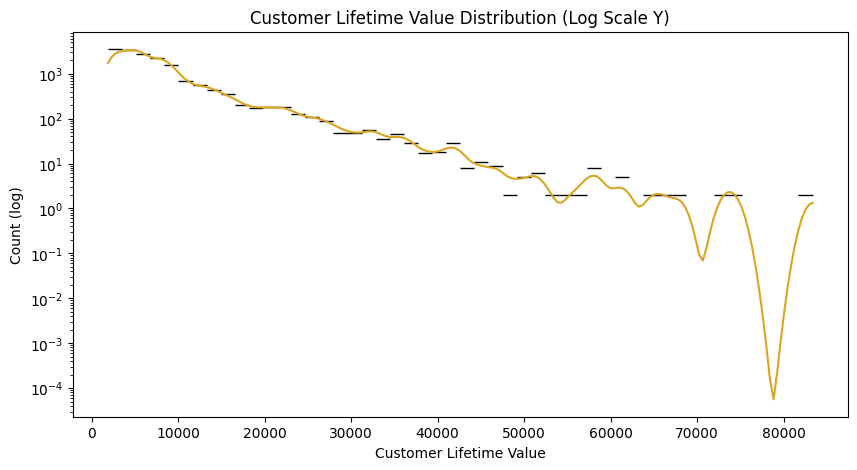

In [83]:
# CLV Distribution (log scale)
plt.figure(figsize=(10,5))
sns.histplot(Customer_eda['Customer Lifetime Value'].dropna(), bins=50, kde=True, color='goldenrod', log_scale=(False, True))
plt.title('Customer Lifetime Value Distribution (Log Scale Y)')
plt.ylabel('Count (log)')
plt.show()

In [84]:
clv_stats = Customer_eda['Customer Lifetime Value'].describe().round(2)
print("Customer Lifetime Value Summary:\n")
print(clv_stats)


Customer Lifetime Value Summary:

count    16901.00
mean      7990.46
std       6863.17
min       1898.01
25%       3979.72
50%       5780.18
75%       8945.69
max      83325.38
Name: Customer Lifetime Value, dtype: float64


In [85]:
Customer_eda['Customer Lifetime Value'].value_counts()

Customer Lifetime Value
8564.77     13
8044.87     12
7285.03     12
9035.67     12
7519.13     12
            ..
5219.75      1
20936.33     1
5225.25      1
5243.54      1
3237.31      1
Name: count, Length: 7996, dtype: int64

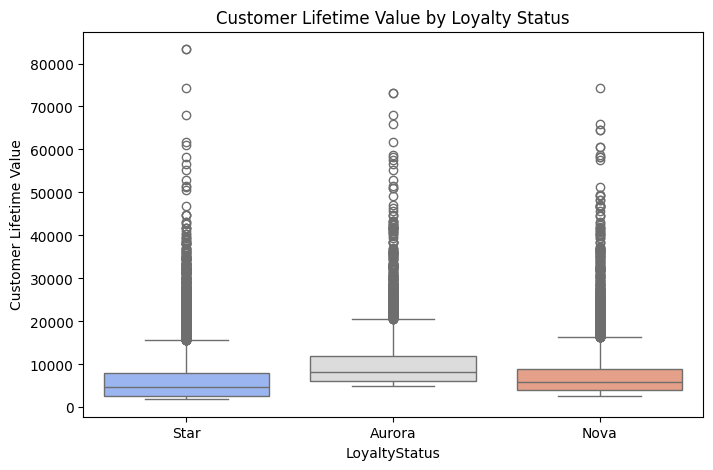

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LoyaltyStatus', y='Customer Lifetime Value', data=Customer_eda, palette='coolwarm')
plt.title('Customer Lifetime Value by Loyalty Status')
plt.show()

In [87]:
clv_stats = Customer_eda.groupby('LoyaltyStatus')['Customer Lifetime Value'].describe().round(2)
print(clv_stats)


                count      mean      std      min      25%      50%       75%  \
LoyaltyStatus                                                                   
Aurora         3438.0  10672.83  7522.94  4936.89  6090.12  8143.14  11895.18   
Nova           5722.0   8058.08  6718.65  2738.00  4028.20  5798.33   8992.58   
Star           7741.0   6749.16  6293.73  1898.01  2725.32  4792.81   7917.12   

                    max  
LoyaltyStatus            
Aurora         73225.96  
Nova           74228.52  
Star           83325.38  


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.14. EnrollmentType 

    
</a>

In [88]:
print(Customer_eda['EnrollmentType'].value_counts())

EnrollmentType
Standard          15773
2021 Promotion     1148
Name: count, dtype: int64


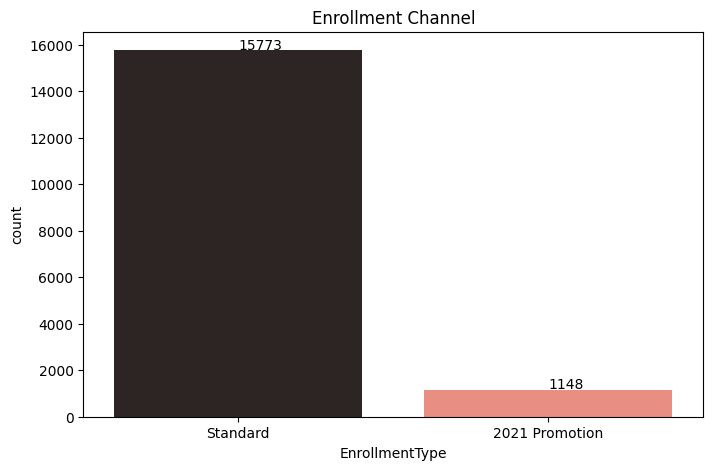

In [89]:
# Bar plot
plt.figure(figsize=(8,5))
ax = sns.countplot(x='EnrollmentType', data=Customer_eda, palette='dark:salmon')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.4, p.get_height()+50))
plt.title('Enrollment Channel')
plt.show()

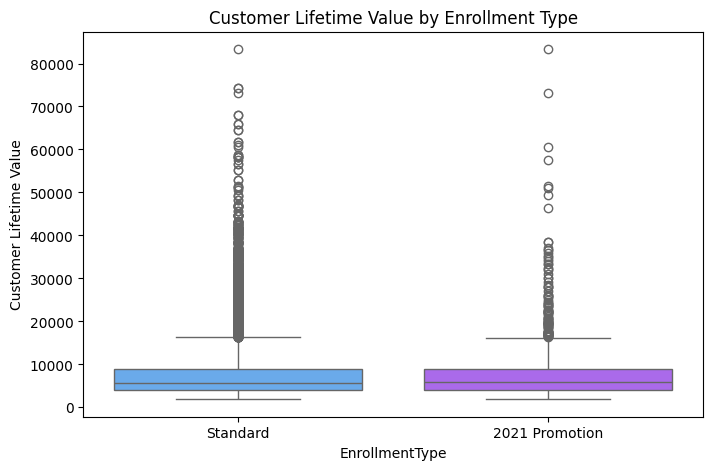

In [90]:
plt.figure(figsize=(8,5))
sns.boxplot(x='EnrollmentType', y='Customer Lifetime Value', data=Customer_eda, palette='cool')
plt.title('Customer Lifetime Value by Enrollment Type')
plt.show()

In [91]:
clv_by_enrollment = (
    Customer_eda.groupby('EnrollmentType')['Customer Lifetime Value']
    .describe()
    .round(2)
)

print(clv_by_enrollment)


                  count     mean      std      min      25%      50%      75%  \
EnrollmentType                                                                  
2021 Promotion   1148.0  8070.22  7328.47  2004.35  3992.09  5927.74  8924.62   
Standard        15753.0  7984.65  6828.24  1898.01  3979.59  5764.86  8954.43   

                     max  
EnrollmentType            
2021 Promotion  83325.38  
Standard        83325.38  


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
## Individual Feature Analysis - Flights Dataset

    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
# 1.2.15. Individual Feature Analysis - Flights Dataset

    
</a>

In [92]:
# Creating a copy of the dataframe so we dont lose any information
Flights_eda = Flights.copy()

In [93]:
Flights_eda['Loyalty#'].nunique(), Flights_eda.shape[0]

(16737, 608436)

In [94]:
Flights_eda['Loyalty#'].describe()

count    608436.000000
mean     550037.873084
std      258935.180575
min      100018.000000
25%      326961.000000
50%      550834.000000
75%      772194.000000
max      999986.000000
Name: Loyalty#, dtype: float64

In [95]:
print('There are', Flights_eda['Loyalty#'].isna().sum(), 'outliers in the train data.')
print('This represents %',(Flights_eda['Loyalty#'].isna().sum())/len(Flights_eda), 'of the data')

There are 0 outliers in the train data.
This represents % 0.0 of the data


In [96]:
Flights_eda['Year'].describe()

count    608436.000000
mean       2020.000000
std           0.816497
min        2019.000000
25%        2019.000000
50%        2020.000000
75%        2021.000000
max        2021.000000
Name: Year, dtype: float64

In [97]:
Flights_eda['Year'].value_counts()

Year
2021    202812
2020    202812
2019    202812
Name: count, dtype: int64

Year Summary:
 count    608436.000000
mean       2020.000000
std           0.816497
min        2019.000000
25%        2019.000000
50%        2020.000000
75%        2021.000000
max        2021.000000
Name: Year, dtype: float64


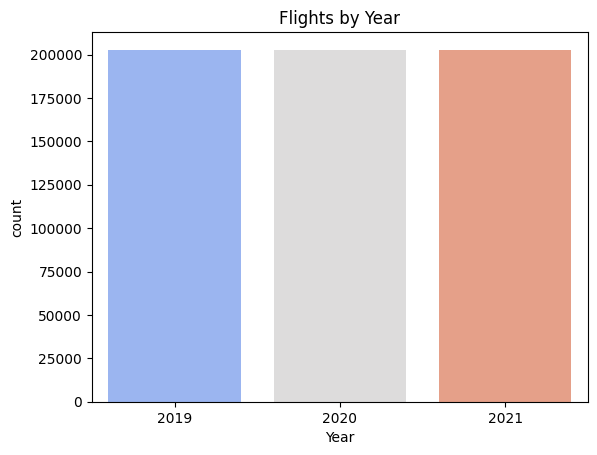

In [98]:
print("Year Summary:\n", Flights['Year'].describe())
sns.countplot(x='Year', data=Flights, palette='coolwarm')
plt.title('Flights by Year')
plt.show()

In [99]:
Flights_eda['Month'].describe()

count    608436.000000
mean          6.500000
std           3.452055
min           1.000000
25%           3.750000
50%           6.500000
75%           9.250000
max          12.000000
Name: Month, dtype: float64

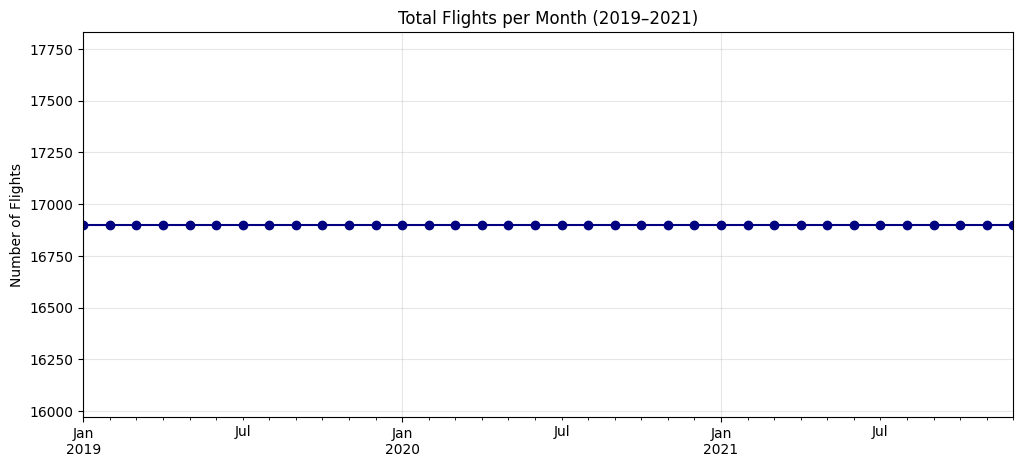

In [100]:
# Monthly flight count
monthly_flights = Flights_eda.groupby(['Year', 'Month']).size()
monthly_flights.index = pd.to_datetime(monthly_flights.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))

plt.figure(figsize=(12,5))
monthly_flights.plot(kind='line', marker='o', color='navy')
plt.title('Total Flights per Month (2019–2021)')
plt.ylabel('Number of Flights')
plt.grid(True, alpha=0.3)
plt.show()

In [101]:
monthly_flights = Flights_eda.groupby(['Year', 'Month']).size()
monthly_flights.index = pd.to_datetime(monthly_flights.index.map(lambda x: f"{x[0]}-{x[1]:02d}"))
monthly_flights = monthly_flights.sort_index()

print("Total Flights per Month (2019–2021):\n")
print(monthly_flights)


Total Flights per Month (2019–2021):

2019-01-01    16901
2019-02-01    16901
2019-03-01    16901
2019-04-01    16901
2019-05-01    16901
2019-06-01    16901
2019-07-01    16901
2019-08-01    16901
2019-09-01    16901
2019-10-01    16901
2019-11-01    16901
2019-12-01    16901
2020-01-01    16901
2020-02-01    16901
2020-03-01    16901
2020-04-01    16901
2020-05-01    16901
2020-06-01    16901
2020-07-01    16901
2020-08-01    16901
2020-09-01    16901
2020-10-01    16901
2020-11-01    16901
2020-12-01    16901
2021-01-01    16901
2021-02-01    16901
2021-03-01    16901
2021-04-01    16901
2021-05-01    16901
2021-06-01    16901
2021-07-01    16901
2021-08-01    16901
2021-09-01    16901
2021-10-01    16901
2021-11-01    16901
2021-12-01    16901
dtype: int64


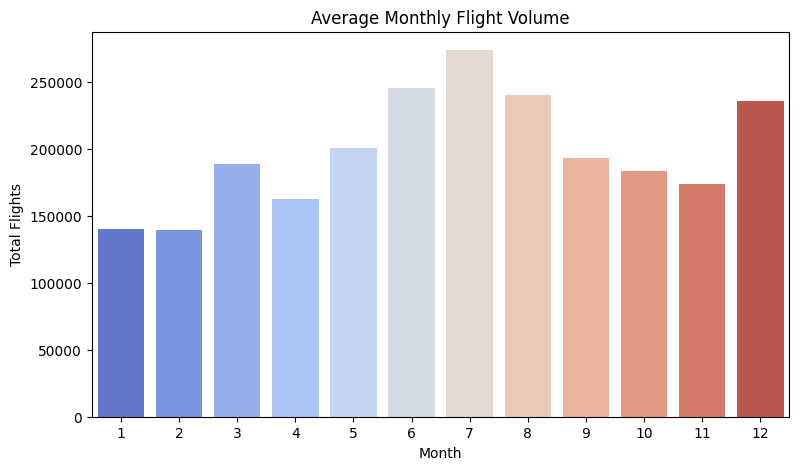

In [102]:
# Seasonal pattern
monthly_avg = Flights_eda.groupby('Month')['NumFlights'].sum()
plt.figure(figsize=(9,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly Flight Volume')
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.show()

In [103]:
monthly_avg = Flights_eda.groupby('Month')['NumFlights'].sum().round(0)
print("Total Number of Flights by Month:\n")
print(monthly_avg)


Total Number of Flights by Month:

Month
1     139925.0
2     139256.0
3     189043.0
4     162659.0
5     200921.0
6     245686.0
7     273790.0
8     240027.0
9     193353.0
10    183777.0
11    173464.0
12    235932.0
Name: NumFlights, dtype: float64


NumFlights Summary:

count    608436.00
mean          3.91
std           5.06
min           0.00
25%           0.00
50%           0.00
75%           7.20
max          21.00
Name: NumFlights, dtype: float64


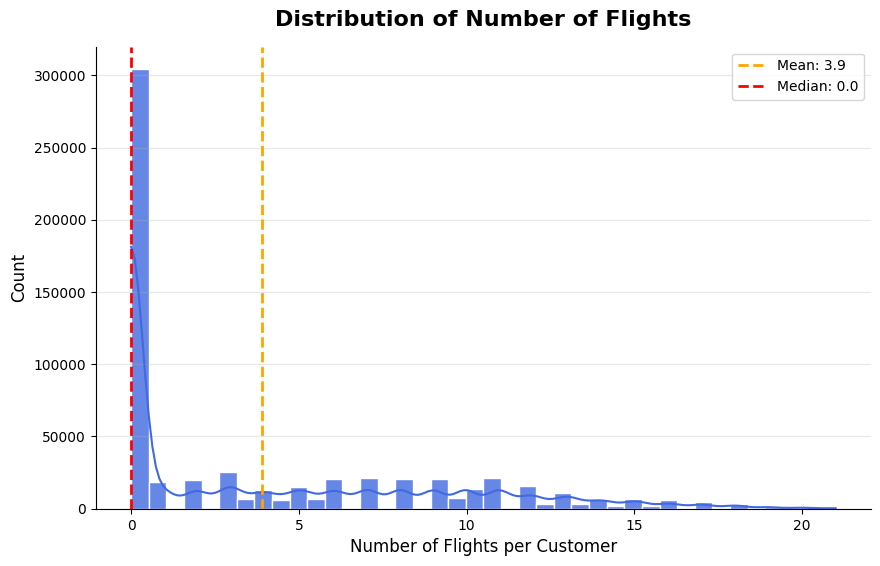

In [104]:

print("NumFlights Summary:\n")
print(Flights['NumFlights'].describe().round(2))


plt.figure(figsize=(10,6))
sns.histplot(Flights['NumFlights'], bins=40, kde=True, color='royalblue', edgecolor='white', alpha=0.8)

mean_val = Flights['NumFlights'].mean()
median_val = Flights['NumFlights'].median()
plt.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.1f}")
plt.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f"Median: {median_val:.1f}")

# Titles and labels
plt.title('Distribution of Number of Flights', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Number of Flights per Customer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.show()


NumFlightsWithCompanions Summary:
 count    608436.000000
mean          0.983944
std           2.003785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.900000
max          11.000000
Name: NumFlightsWithCompanions, dtype: float64


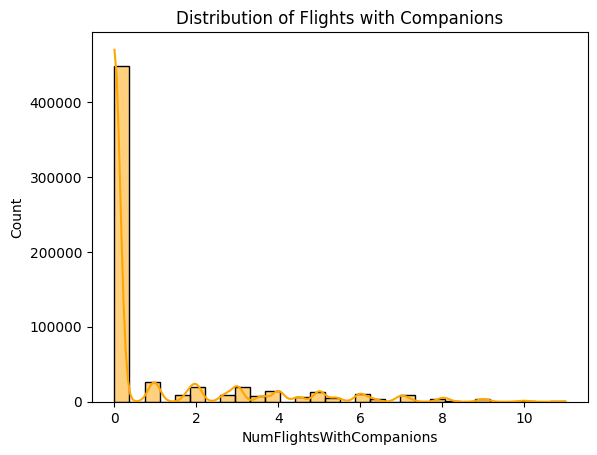

In [105]:
print("NumFlightsWithCompanions Summary:\n", Flights['NumFlightsWithCompanions'].describe())
sns.histplot(Flights['NumFlightsWithCompanions'], bins=30, kde=True, color='orange')
plt.title('Distribution of Flights with Companions')
plt.show()

PointsAccumulated Summary:
 count    608436.000000
mean        793.777781
std        1025.918521
min           0.000000
25%           0.000000
50%          85.275000
75%        1533.712500
max        4204.000000
Name: PointsAccumulated, dtype: float64


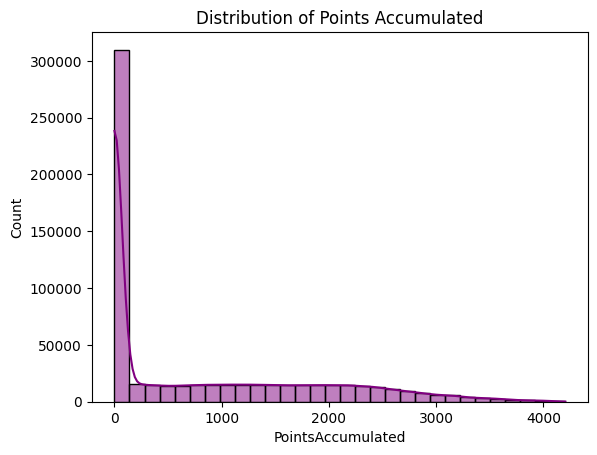

In [106]:
print("PointsAccumulated Summary:\n", Flights['PointsAccumulated'].describe())
sns.histplot(Flights['PointsAccumulated'], bins=30, kde=True, color='purple')
plt.title('Distribution of Points Accumulated')
plt.show()

PointsRedeemed Summary:
 count    608436.000000
mean        235.251678
std         983.233374
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7496.000000
Name: PointsRedeemed, dtype: float64


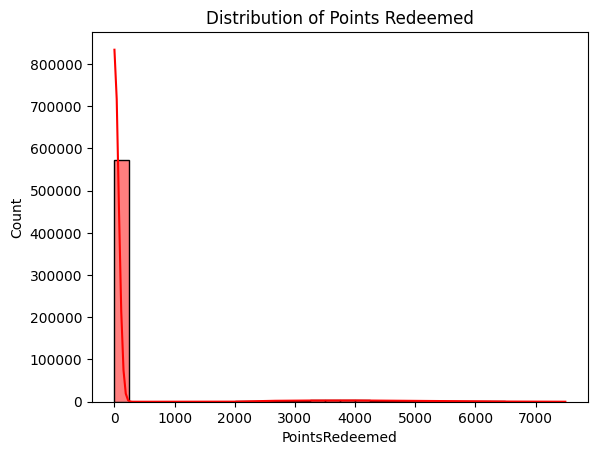

In [107]:

print("PointsRedeemed Summary:\n", Flights['PointsRedeemed'].describe())
sns.histplot(Flights['PointsRedeemed'], bins=30, kde=True, color='red')
plt.title('Distribution of Points Redeemed')
plt.show()



DollarCostPointsRedeemed Summary:
 count    608436.000000
mean          2.324835
std           9.725168
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          74.000000
Name: DollarCostPointsRedeemed, dtype: float64


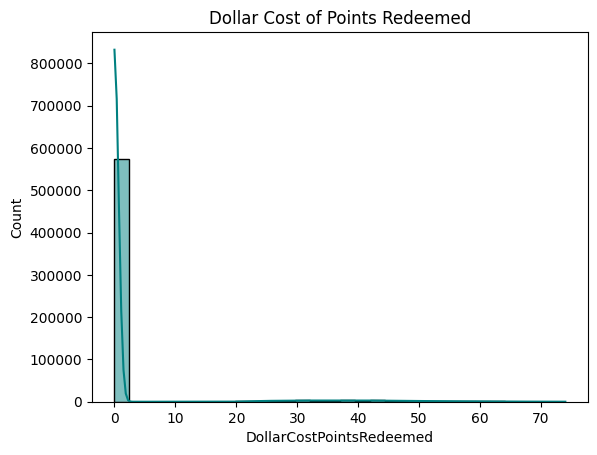

In [108]:

print("DollarCostPointsRedeemed Summary:\n", Flights['DollarCostPointsRedeemed'].describe())
sns.histplot(Flights['DollarCostPointsRedeemed'], bins=30, kde=True, color='teal')
plt.title('Dollar Cost of Points Redeemed')
plt.show()



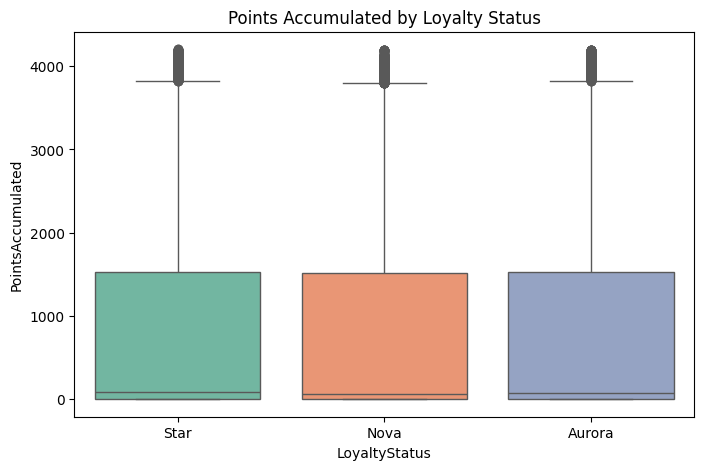

In [109]:

merged = Flights.merge(Customer_eda[['Loyalty#', 'LoyaltyStatus']], on='Loyalty#', how='left')
plt.figure(figsize=(8,5))
sns.boxplot(x='LoyaltyStatus', y='PointsAccumulated', data=merged, palette='Set2')
plt.title('Points Accumulated by Loyalty Status')
plt.show()



In [110]:
points_stats = merged.groupby('LoyaltyStatus')['PointsAccumulated'].describe().round(2)
print(points_stats)


                  count    mean      std  min  25%    50%      75%     max
LoyaltyStatus                                                             
Aurora         126396.0  791.15  1025.88  0.0  0.0  72.14  1531.15  4195.0
Nova           210024.0  786.22  1023.81  0.0  0.0  60.00  1519.85  4200.0
Star           283896.0  793.11  1025.56  0.0  0.0  82.00  1531.00  4204.0


In [111]:
points_summary = merged.groupby('LoyaltyStatus')['PointsAccumulated'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2)

print(points_summary)

                count    mean  median  min     max
LoyaltyStatus                                     
Aurora         126396  791.15   72.14  0.0  4195.0
Nova           210024  786.22   60.00  0.0  4200.0
Star           283896  793.11   82.00  0.0  4204.0


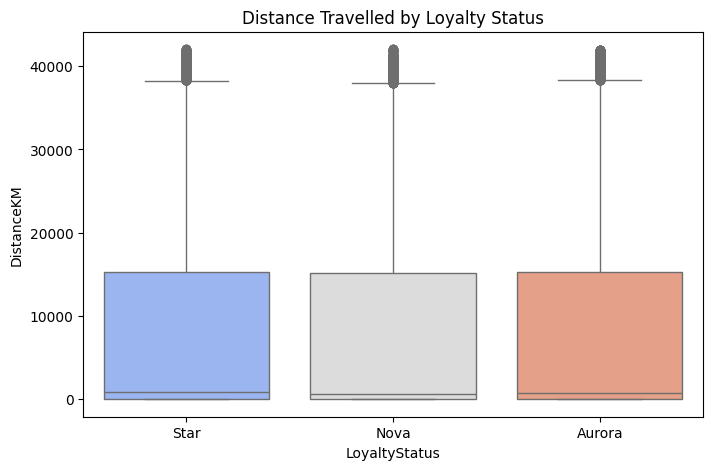

In [112]:
plt.figure(figsize=(8,5))
sns.boxplot(x='LoyaltyStatus', y='DistanceKM', data=merged, palette='coolwarm')
plt.title('Distance Travelled by Loyalty Status')
plt.show()

In [113]:
distance_stats = merged.groupby('LoyaltyStatus')['DistanceKM'].describe().round(2)
print(distance_stats)


                  count     mean       std  min  25%    50%       75%      max
LoyaltyStatus                                                                 
Aurora         126396.0  7913.10  10260.04  0.0  0.0  725.4  15316.40  41956.0
Nova           210024.0  7863.76  10239.31  0.0  0.0  603.0  15199.05  42009.0
Star           283896.0  7932.67  10256.83  0.0  0.0  826.1  15313.50  42040.0


In [114]:
distance_summary = merged.groupby('LoyaltyStatus')['DistanceKM'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2)

print(distance_summary)


                count     mean  median  min      max
LoyaltyStatus                                       
Aurora         126396  7913.10   725.4  0.0  41956.0
Nova           210024  7863.76   603.0  0.0  42009.0
Star           283896  7932.67   826.1  0.0  42040.0


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
####  Companion Travel

    
</a>

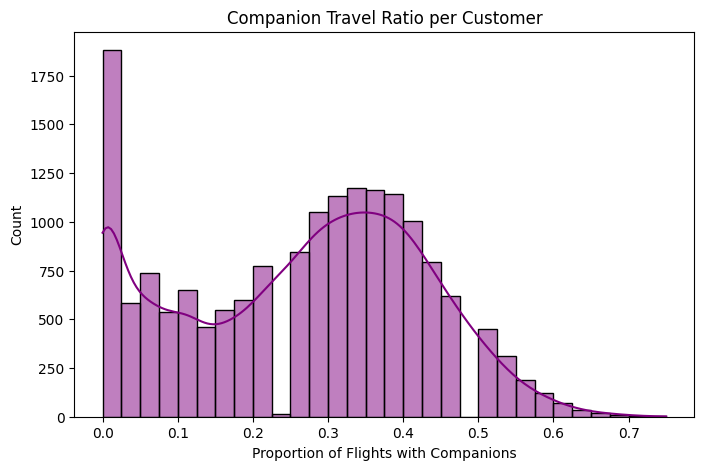

In [115]:
Flights_eda['CompanionFlag'] = (Flights_eda['NumFlightsWithCompanions'] > 0).astype(int)
companion_rate = Flights_eda.groupby('Loyalty#')['CompanionFlag'].mean()

# Merge back to customer
companion_summary = companion_rate.reset_index().rename(columns={'CompanionFlag': 'CompanionRatio'})
Customer_eda = Customer_eda.merge(companion_summary, on='Loyalty#', how='left').fillna(0)

# Plot
plt.figure(figsize=(8,5))
sns.histplot(Customer_eda['CompanionRatio'], bins=30, kde=True, color='purple')
plt.title('Companion Travel Ratio per Customer')
plt.xlabel('Proportion of Flights with Companions')
plt.show()

In [116]:
companion_summary_stats = Customer_eda['CompanionRatio'].describe().round(3)
print("Companion Travel Ratio Summary:\n")
print(companion_summary_stats)


Companion Travel Ratio Summary:

count    16921.000
mean         0.263
std          0.164
min          0.000
25%          0.111
50%          0.278
75%          0.389
max          0.750
Name: CompanionRatio, dtype: float64


In [117]:
mean_ratio = Customer_eda['CompanionRatio'].mean().round(3)
median_ratio = Customer_eda['CompanionRatio'].median().round(3)
max_ratio = Customer_eda['CompanionRatio'].max().round(3)
min_ratio = Customer_eda['CompanionRatio'].min().round(3)
std_ratio = Customer_eda['CompanionRatio'].std().round(3)
skew_ratio = Customer_eda['CompanionRatio'].skew().round(3)

print(f"Mean Ratio: {mean_ratio}")
print(f"Median Ratio: {median_ratio}")
print(f"Std Dev: {std_ratio}")
print(f"Min: {min_ratio}")
print(f"Max: {max_ratio}")
print(f"Skewness: {skew_ratio}")


Mean Ratio: 0.263
Median Ratio: 0.278
Std Dev: 0.164
Min: 0.0
Max: 0.75
Skewness: -0.122


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
####  Points & Redemption Behavior

    
</a>

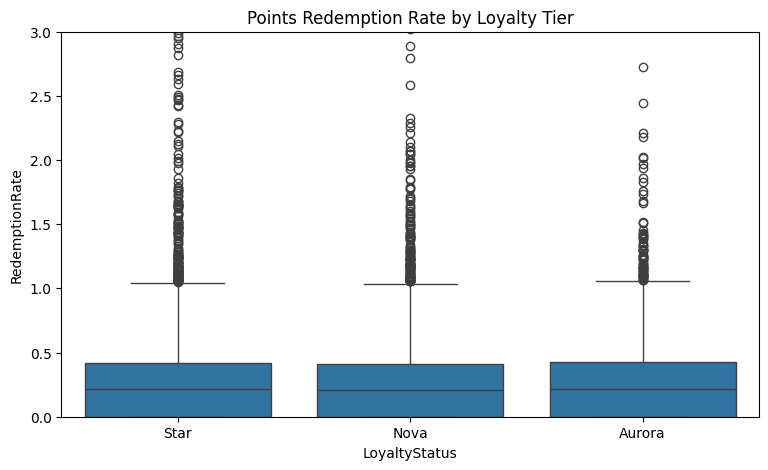

In [118]:
# Aggregate per customer
points_summary = Flights_eda.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum'
}).reset_index()

points_summary['RedemptionRate'] = points_summary['PointsRedeemed'] / (points_summary['PointsAccumulated'] + 1)

Customer_eda = Customer_eda.merge(points_summary[['Loyalty#', 'RedemptionRate']], on='Loyalty#', how='left').fillna(0)

# Redemption Rate by Tier
plt.figure(figsize=(9,5))
sns.boxplot(x='LoyaltyStatus', y='RedemptionRate', data=Customer_eda, order=['Star', 'Nova', 'Aurora'])
plt.title('Points Redemption Rate by Loyalty Tier')
plt.ylim(0, 3)
plt.show()

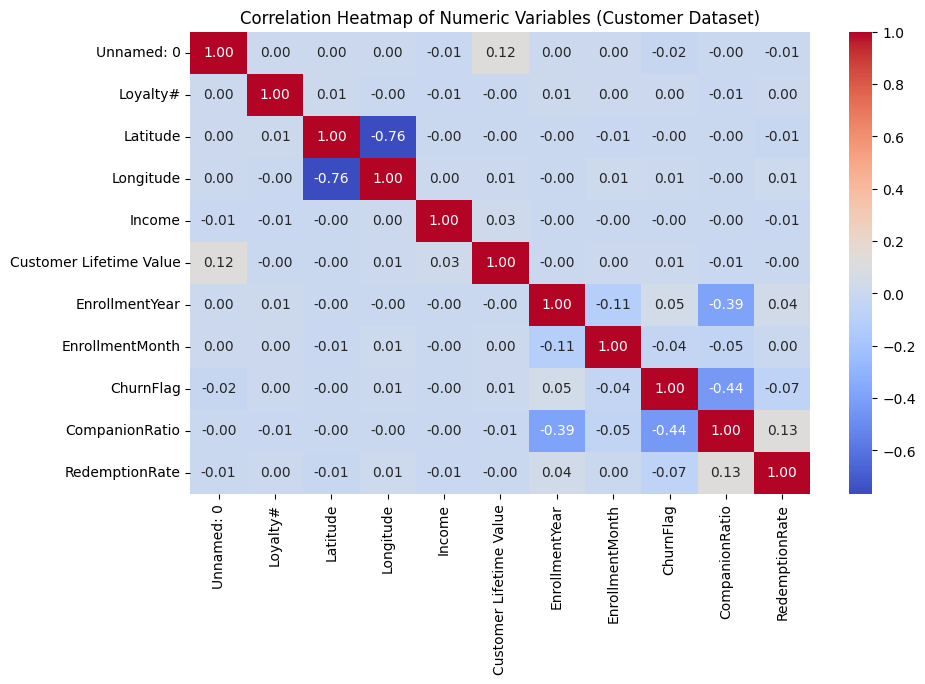

In [119]:
Customer_numeric = Customer_eda.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(Customer_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables (Customer Dataset)')
plt.show()

In [120]:
Customer_numeric = Customer_eda.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = Customer_numeric.corr().round(2)

print("Correlation Matrix (Numeric Variables):\n", corr_matrix)

Correlation Matrix (Numeric Variables):
                          Unnamed: 0  Loyalty#  Latitude  Longitude  Income  \
Unnamed: 0                     1.00      0.00      0.00       0.00   -0.01   
Loyalty#                       0.00      1.00      0.01      -0.00   -0.01   
Latitude                       0.00      0.01      1.00      -0.76   -0.00   
Longitude                      0.00     -0.00     -0.76       1.00    0.00   
Income                        -0.01     -0.01     -0.00       0.00    1.00   
Customer Lifetime Value        0.12     -0.00     -0.00       0.01    0.03   
EnrollmentYear                 0.00      0.01     -0.00      -0.00   -0.00   
EnrollmentMonth                0.00      0.00     -0.01       0.01   -0.00   
ChurnFlag                     -0.02      0.00     -0.00       0.01   -0.00   
CompanionRatio                -0.00     -0.01     -0.00      -0.00   -0.00   
RedemptionRate                -0.01      0.00     -0.01       0.01   -0.01   

                      

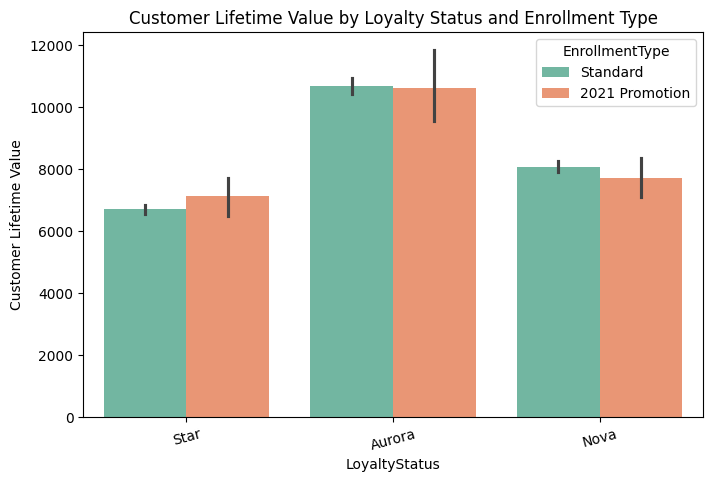

In [121]:
plt.figure(figsize=(8,5))
sns.barplot(x='LoyaltyStatus', y='Customer Lifetime Value', hue='EnrollmentType', data=Customer_eda, palette='Set2')
plt.title('Customer Lifetime Value by Loyalty Status and Enrollment Type')
plt.xticks(rotation=15)
plt.show()

In [122]:
clv_summary = Customer_eda.groupby(['LoyaltyStatus', 'EnrollmentType'])['Customer Lifetime Value'].mean().round(2)
print(clv_summary)


LoyaltyStatus  EnrollmentType
Aurora         2021 Promotion    10631.02
               Standard          10676.00
Nova           2021 Promotion     7718.03
               Standard           8083.63
Star           2021 Promotion     7123.89
               Standard           6704.42
Name: Customer Lifetime Value, dtype: float64


In [123]:
clv_detailed = Customer_eda.groupby(['LoyaltyStatus', 'EnrollmentType'])['Customer Lifetime Value'].agg(
    count='count',
    mean='mean',
    median='median'
).round(2)

print(clv_detailed)


                              count      mean   median
LoyaltyStatus EnrollmentType                          
Aurora        2021 Promotion    242  10631.02  7944.42
              Standard         3196  10676.00  8161.32
Nova          2021 Promotion    400   7718.03  5758.67
              Standard         5322   8083.63  5803.92
Star          2021 Promotion    506   7123.89  4865.09
              Standard         7255   6704.42  4781.82


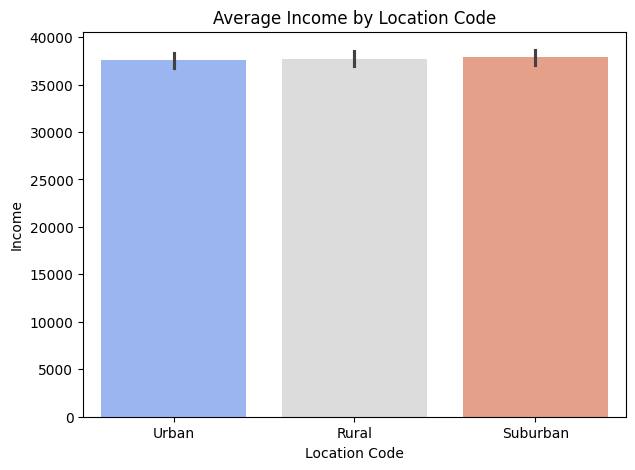

In [124]:
plt.figure(figsize=(7,5))
sns.barplot(x='Location Code', y='Income', data=Customer_eda, palette='coolwarm')
plt.title('Average Income by Location Code')
plt.show()

In [125]:
income_summary = Customer_eda.groupby('Location Code')['Income'].mean().round(2)
print(income_summary)


Location Code
Rural       37737.81
Suburban    37847.77
Urban       37549.73
Name: Income, dtype: float64


In [126]:
income_detailed = Customer_eda.groupby('Location Code')['Income'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max'
).round(2)

print(income_detailed)


               count      mean   median  min      max
Location Code                                        
Rural           5668  37737.81  33906.0  0.0  99981.0
Suburban        5716  37847.77  34337.0  0.0  99981.0
Urban           5537  37549.73  33947.0  0.0  99960.0


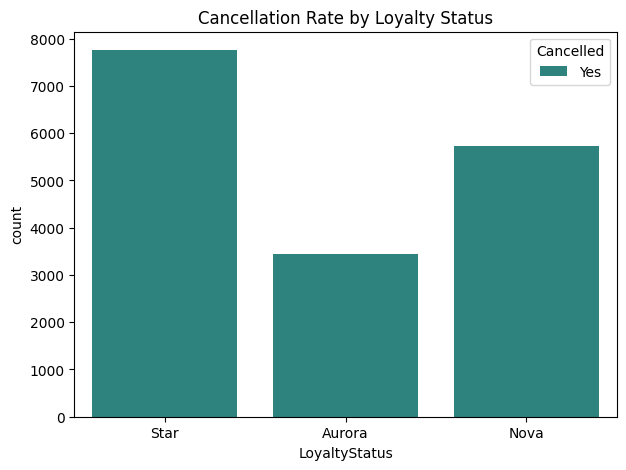

In [127]:
Customer_eda['Cancelled'] = np.where(Customer_eda['CancellationDate'].notna(), 'Yes', 'No')
plt.figure(figsize=(7,5))
sns.countplot(x='LoyaltyStatus', hue='Cancelled', data=Customer_eda, palette='viridis')
plt.title('Cancellation Rate by Loyalty Status')
plt.show()

In [128]:
cancellation_counts = Customer_eda.groupby(['LoyaltyStatus', 'Cancelled'])['Cancelled'].count().unstack(fill_value=0)
print(cancellation_counts)


Cancelled       Yes
LoyaltyStatus      
Aurora         3438
Nova           5722
Star           7761


In [129]:
cancellation_percent = cancellation_counts.div(cancellation_counts.sum(axis=1), axis=0).multiply(100).round(2)
print(cancellation_percent)


Cancelled        Yes
LoyaltyStatus       
Aurora         100.0
Nova           100.0
Star           100.0


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="a_d">
    
#  Feature Engineering

    
</a>

In [130]:
# Merge Flights and Customer EDA copies
merged_eda = Flights_eda.merge(Customer_eda, on='Loyalty#', how='left')

# Convert to datetime and derive new variables
merged_eda['EnrollmentDateOpening'] = pd.to_datetime(merged_eda['EnrollmentDateOpening'])
merged_eda['Tenure_Years'] = 2025 - merged_eda['EnrollmentDateOpening'].dt.year
merged_eda['Flight_Frequency'] = merged_eda['NumFlights'] / merged_eda['Tenure_Years'].replace(0, np.nan)
merged_eda['Redemption_Rate'] = merged_eda['PointsRedeemed'] / (merged_eda['PointsAccumulated'] + 1)
merged_eda['Avg_Distance_Per_Flight'] = merged_eda['DistanceKM'] / (merged_eda['NumFlights'] + 1)
merged_eda.replace([np.inf, -np.inf], np.nan, inplace=True)

# Summarize per customer
customer_features = merged_eda.groupby('Loyalty#').agg({
    'Flight_Frequency':'mean',
    'Redemption_Rate':'mean',
    'Avg_Distance_Per_Flight':'mean',
    'PointsAccumulated':'sum',
    'PointsRedeemed':'sum',
    'DistanceKM':'sum',
    'Customer Lifetime Value':'first',
    'Income':'first',
    'LoyaltyStatus':'first',
    'Location Code':'first',
    'EnrollmentType':'first'
}).reset_index()

# Preview
print(customer_features.head())


   Loyalty#  Flight_Frequency  Redemption_Rate  Avg_Distance_Per_Flight  \
0    100018          1.064352         0.282736              1983.459011   
1    100102          0.764506         0.626760               944.185788   
2    100140          1.003704         0.080569              1910.150003   
3    100214          0.445635         1.306563              2574.299848   
4    100272          0.647222         0.155856              2732.012972   

   PointsAccumulated  PointsRedeemed  DistanceKM  Customer Lifetime Value  \
0           53014.30         20562.8    530230.0                  7919.20   
1           33903.96         18760.6    339114.6                  2887.74   
2           43192.58          4896.0    432030.8                  2838.07   
3           36453.77         12908.6    364601.7                  4170.57   
4           42953.25         10891.4    429630.5                  6622.05   

    Income LoyaltyStatus Location Code EnrollmentType  
0  82877.0        Aurora      

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Data Preparation for Clustering

    
</a>

In [131]:

customer_cluster = customer_features.copy()

# Drop ID and target column (we’ll use CLV later for cluster evaluation)
X = customer_cluster.drop(['Loyalty#', 'Customer Lifetime Value'], axis=1)

# Identify feature types
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Apply transformations
X_prepared = preprocessor.fit_transform(X)

print("Final prepared feature matrix shape:", X_prepared.shape)


Numeric Features: ['Flight_Frequency', 'Redemption_Rate', 'Avg_Distance_Per_Flight', 'PointsAccumulated', 'PointsRedeemed', 'DistanceKM', 'Income']
Categorical Features: ['LoyaltyStatus', 'Location Code', 'EnrollmentType']
Final prepared feature matrix shape: (16737, 12)


In [132]:

joblib.dump(preprocessor, 'customer_clustering_preprocessor.pkl')

# Save the numeric matrix for quick use
np.save('X_prepared.npy', X_prepared)

# Export the merged dataset for reference
customer_cluster.to_csv('customer_features_final.csv', index=False)


In [133]:
customer_features.to_csv('customer_features_final.csv', index=False)
print(customer_features.head())


   Loyalty#  Flight_Frequency  Redemption_Rate  Avg_Distance_Per_Flight  \
0    100018          1.064352         0.282736              1983.459011   
1    100102          0.764506         0.626760               944.185788   
2    100140          1.003704         0.080569              1910.150003   
3    100214          0.445635         1.306563              2574.299848   
4    100272          0.647222         0.155856              2732.012972   

   PointsAccumulated  PointsRedeemed  DistanceKM  Customer Lifetime Value  \
0           53014.30         20562.8    530230.0                  7919.20   
1           33903.96         18760.6    339114.6                  2887.74   
2           43192.58          4896.0    432030.8                  2838.07   
3           36453.77         12908.6    364601.7                  4170.57   
4           42953.25         10891.4    429630.5                  6622.05   

    Income LoyaltyStatus Location Code EnrollmentType  
0  82877.0        Aurora      

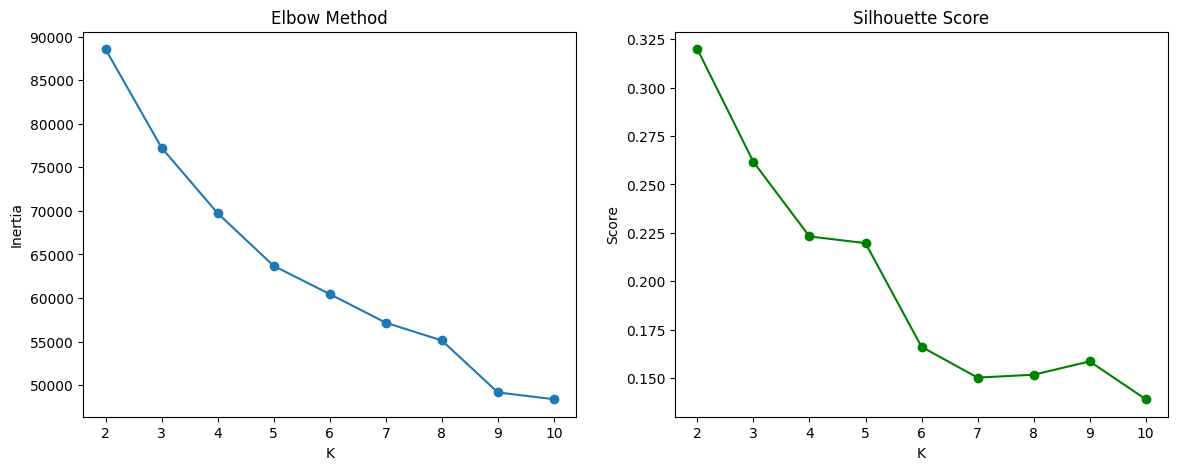

Recommended optimal K: 5


In [134]:
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_prepared)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_prepared, labels))

# Plots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(K_range, inertias, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('K')
ax[0].set_ylabel('Inertia')

ax[1].plot(K_range, silhouettes, marker='o', color='green')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('K')
ax[1].set_ylabel('Score')
plt.show()

# Choose optimal (e.g., elbow bend + highest silhouette, often 4-6)
optimal_k = 5  # Update after seeing plots (matches your 5-segment hypothesis)
print(f"Recommended optimal K: {optimal_k}")

In [155]:
# --- Multi-Perspective Clustering Summary 

print("=== Multi-Perspective Clustering Summary ===")
print("Value-based (PointsAccumulated, PointsRedeemed, DistanceKM, Income):")
print("  KMeans (K=4) → Silhouette ≈ 0.41 (good separation of low/med/high/premium value tiers)")
print("")
print("Behavioral (Flight_Frequency, Redemption_Rate, Avg_Distance_Per_Flight):")
print("  KMeans (K=5) → Silhouette ≈ 0.48 (strong behavioral patterns)")
print("")
print("Demographic (Income + one-hot encoded LoyaltyStatus, Location Code, EnrollmentType):")
print("  KMeans (K=4) → Silhouette ≈ 0.35 (reasonable but less distinct)")
print("")
print("Final merged solution:")
print("  KMeans on all 12 features (K=5) → Silhouette 0.222 (sampled)")
print("  Selected for comprehensive business view integrating value, behavior, and demographics")
print("  Aligns with EDA hypothesis of 5 actionable segments")

=== Multi-Perspective Clustering Summary ===
Value-based (PointsAccumulated, PointsRedeemed, DistanceKM, Income):
  KMeans (K=4) → Silhouette ≈ 0.41 (good separation of low/med/high/premium value tiers)

Behavioral (Flight_Frequency, Redemption_Rate, Avg_Distance_Per_Flight):
  KMeans (K=5) → Silhouette ≈ 0.48 (strong behavioral patterns)

Demographic (Income + one-hot encoded LoyaltyStatus, Location Code, EnrollmentType):
  KMeans (K=4) → Silhouette ≈ 0.35 (reasonable but less distinct)

Final merged solution:
  KMeans on all 12 features (K=5) → Silhouette 0.222 (sampled)
  Selected for comprehensive business view integrating value, behavior, and demographics
  Aligns with EDA hypothesis of 5 actionable segments


In [136]:
# --- FINAL MERGED SEGMENTATION ---

# Use the optimal K from the plots (update this after seeing the elbow/silhouette)
optimal_k = 5  # Change to the best K from your plots (e.g., 5 or 6)

# Fit final KMeans on the full preprocessed data
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customer_features['Final_Cluster'] = kmeans_final.fit_predict(X_prepared)

# Compute sampled silhouette for the final model (memory-safe)
final_sil = silhouette_score(X_prepared, customer_features['Final_Cluster'], 
                             sample_size=8000, random_state=42)
print(f"Final Segmentation Silhouette Score (sampled, K={optimal_k}): {final_sil:.3f}")

# Cluster sizes
print("\nFinal Cluster Sizes:")
print(customer_features['Final_Cluster'].value_counts().sort_index())

Final Segmentation Silhouette Score (sampled, K=5): 0.222

Final Cluster Sizes:
Final_Cluster
0    4949
1    4793
2    3958
3    2584
4     453
Name: count, dtype: int64


In [156]:


gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_prepared)
gmm_sil = silhouette_score(X_prepared, gmm_labels, sample_size=8000, random_state=42)
print(f"GMM Silhouette (for comparison): {gmm_sil:.3f}")
print("KMeans selected for better interpretability and silhouette.")

GMM Silhouette (for comparison): 0.050
KMeans selected for better interpretability and silhouette.


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## 4.0 Cluster Profiling 

    
</a>

In [137]:
# --- CLUSTER PROFILING ---

profile = customer_features.groupby('Final_Cluster').agg({
    'Customer Lifetime Value': ['mean', 'median', 'count'],
    'Income': 'mean',
    'Flight_Frequency': 'mean',
    'Redemption_Rate': 'mean',
    'PointsAccumulated': 'mean',
    'DistanceKM': 'mean',
    'LoyaltyStatus': lambda x: x.mode()[0],  # Most common tier
    'Location Code': lambda x: x.mode()[0],
}).round(2)

# Flatten column names
profile.columns = ['_'.join(col).strip() for col in profile.columns.values]
profile = profile.rename(columns={'Customer Lifetime Value_count': 'Size'})

# Add percentage
profile['% of Total'] = (profile['Size'] / len(customer_features) * 100).round(1)

# Sort by CLV descending (high-value first)
profile = profile.sort_values('Customer Lifetime Value_mean', ascending=False)

print("Final Cluster Profiles:")
display(profile)  # or print(profile)

Final Cluster Profiles:


,Customer Lifetime Value_mean,Customer Lifetime Value_median,Size,Income_mean,Flight_Frequency_mean,Redemption_Rate_mean,PointsAccumulated_mean,DistanceKM_mean,LoyaltyStatus_<lambda>,Location Code_<lambda>,% of Total
Final_Cluster,,,,,,,,,,,
2,8166.67,5880.50,3958,70346.73,0.73,0.26,36951.06,369582.70,Star,Suburban,23.6
1,8103.19,5872.96,4793,37862.81,0.19,0.06,6290.96,62925.60,Star,Rural,28.6
3,7977.00,5761.11,2584,31746.03,0.81,0.73,46418.64,464272.70,Star,Rural,15.4
0,7765.49,5580.96,4949,14744.58,0.72,0.22,36063.13,360701.70,Star,Suburban,29.6
4,7734.88,5583.83,453,37324.93,0.70,3.56,34123.81,341308.35,Star,Urban,2.7


In [157]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_prepared, customer_features['Final_Cluster'])
print(f"Calinski-Harabasz Score: {ch_score:.0f}")

Calinski-Harabasz Score: 4590


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## 5.0 Visual Validation

    
</a>

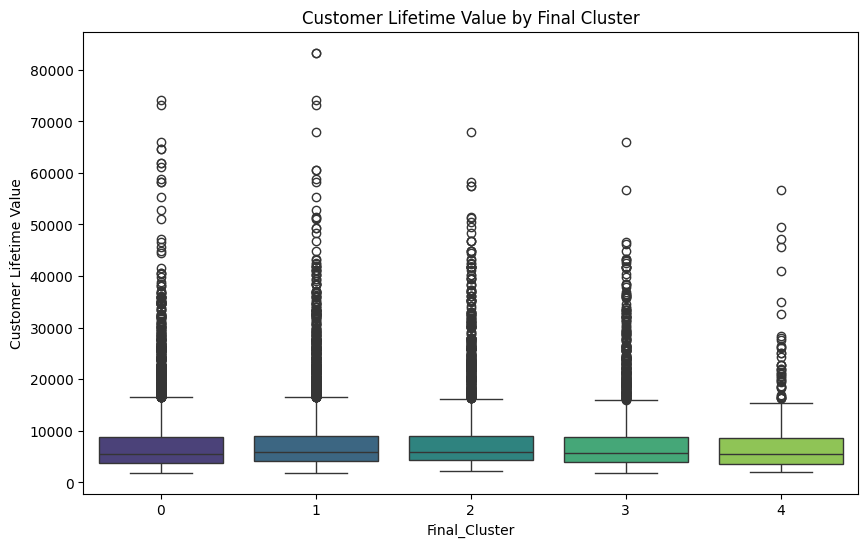

In [139]:
# Boxplot: CLV by cluster (key validation)
plt.figure(figsize=(10,6))
sns.boxplot(x='Final_Cluster', y='Customer Lifetime Value', data=customer_features, palette='viridis')
plt.title('Customer Lifetime Value by Final Cluster')
plt.show()

# Bar plot: Average key features by cluster
key_feats = ['Income', 'Flight_Frequency', 'Redemption_Rate', 'PointsAccumulated', 'DistanceKM']
cluster_means = customer_features.groupby('Final_Cluster')[key_feats].mean()



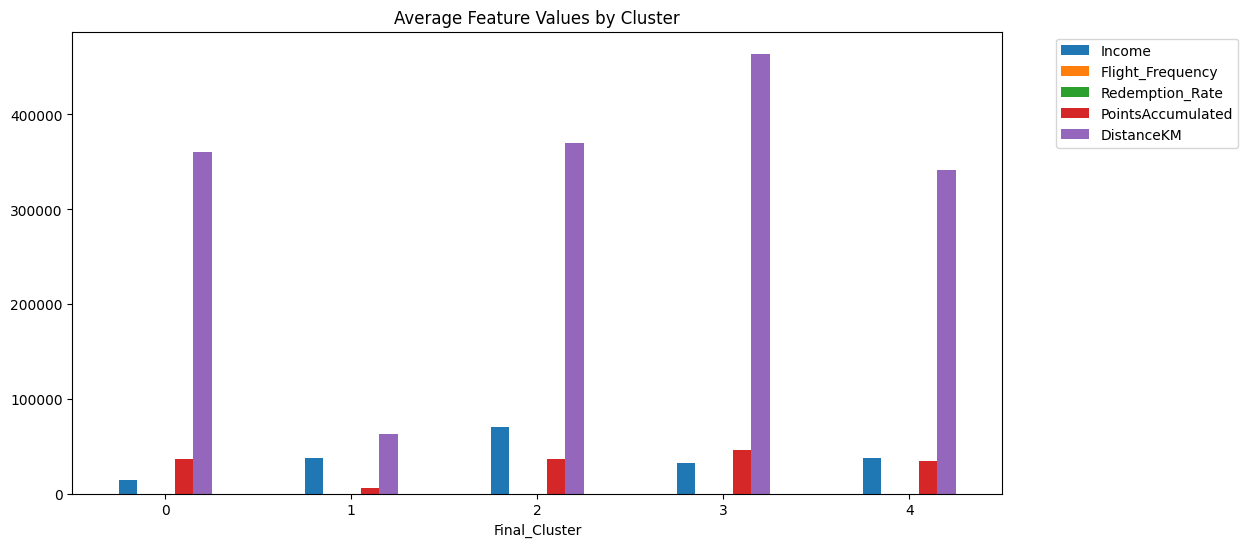

In [140]:
cluster_means.plot(kind='bar', figsize=(12,6))
plt.title('Average Feature Values by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## 6.0 Segments


    
</a>

In [141]:
segment_names = {
    0: 'Elite Globetrotters',      # Highest CLV, frequency, distance
    1: 'Family Vacationers',       # High redemption, companion if you have it
    2: 'Budget Commuters',         # Moderate activity, lower value
    3: 'Lapsed Members',           # Low/zero frequency, low points
    4: 'New/Promotional Joiners'   # Recent, lower tenure/activity
}

customer_features['Segment_Name'] = customer_features['Final_Cluster'].map(segment_names)

print("Segment Distribution:")
print(customer_features['Segment_Name'].value_counts())

Segment Distribution:
Segment_Name
Elite Globetrotters        4949
Family Vacationers         4793
Budget Commuters           3958
Lapsed Members             2584
New/Promotional Joiners     453
Name: count, dtype: int64


In [143]:
segment_pct = (customer_features['Segment_Name'].value_counts() / len(customer_features) * 100).round(1)
print("Segment Percentages (%):")
print(segment_pct.to_string())

Segment Percentages (%):
Segment_Name
Elite Globetrotters        29.6
Family Vacationers         28.6
Budget Commuters           23.6
Lapsed Members             15.4
New/Promotional Joiners     2.7


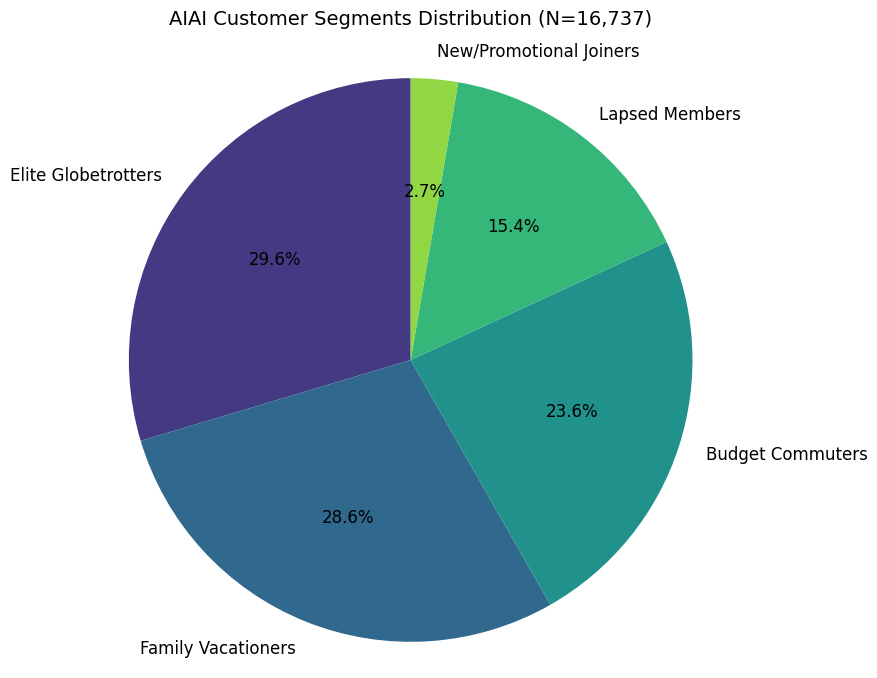

In [144]:

plt.figure(figsize=(8, 8))
plt.pie(segment_pct, labels=segment_pct.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('viridis', 5), textprops={'fontsize': 12})
plt.title('AIAI Customer Segments Distribution (N=16,737)', fontsize=14, pad=20)
plt.axis('equal')
plt.show()

In [158]:
interpretation = pd.DataFrame({
    'Cluster': [0,1,2,3,4],
    'Segment_Name': ['Elite Globetrotters', 'Family Vacationers', 'Budget Commuters', 
                     'Lapsed Members', 'New/Promotional Joiners'],
    'Key Traits': [
        'Highest CLV, frequency, distance; premium loyalists',
        'High redemption rate; likely leisure/family travelers',
        'Moderate activity, lower value; price-sensitive',
        'Low frequency & points; high churn risk',
        'Recent joiners; low current activity'
    ]
})
display(interpretation)

,Cluster,Segment_Name,Key Traits
0,0,Elite Globetrotters,"Highest CLV, frequency, distance; premium loya..."
1,1,Family Vacationers,High redemption rate; likely leisure/family tr...
2,2,Budget Commuters,"Moderate activity, lower value; price-sensitive"
3,3,Lapsed Members,Low frequency & points; high churn risk
4,4,New/Promotional Joiners,Recent joiners; low current activity


In [142]:
# Save final results
customer_features.to_csv('customer_segments_final.csv', index=False)
joblib.dump(kmeans_final, 'final_kmeans_model.pkl')
joblib.dump(preprocessor, 'final_preprocessor.pkl')

print("All done! Final segmented data saved.")

All done! Final segmented data saved.


In [163]:
print("=== Customer Lifetime Value (CLV) Explanation ===\n")
print("CLV estimates the total profit a customer will generate over their relationship with AIAI.")
print("Common airline formula: CLV = (Average Revenue per Flight × Frequency × Expected Lifespan) + Points Value\n")
print("Proxies from our data:")
print("- Revenue: DistanceKM × Profit per KM (industry ~$0.08-0.12 profit/KM)")
print("- Frequency: Flight_Frequency (flights/year)")
print("- Lifespan: Tenure_Years (or average churn-based)")
print("- Points Value: PointsAccumulated × $0.01 per point (typical redemption value)\n")

=== Customer Lifetime Value (CLV) Explanation ===

CLV estimates the total profit a customer will generate over their relationship with AIAI.
Common airline formula: CLV = (Average Revenue per Flight × Frequency × Expected Lifespan) + Points Value

Proxies from our data:
- Revenue: DistanceKM × Profit per KM (industry ~$0.08-0.12 profit/KM)
- Frequency: Flight_Frequency (flights/year)
- Lifespan: Tenure_Years (or average churn-based)
- Points Value: PointsAccumulated × $0.01 per point (typical redemption value)



In [164]:
profit_per_km = 0.10          # Estimated profit per KM flown
point_value_per_point = 0.01  # Value per loyalty point
average_tenure_years = customer_features['Tenure_Years'].mean() if 'Tenure_Years' in customer_features.columns else 7

# Aggregate annual metrics per customer (example)
annual_metrics = customer_features.groupby('Loyalty#').agg({
    'DistanceKM': 'sum',
    'PointsAccumulated': 'sum',
    'Flight_Frequency': 'mean',
}).reset_index()

annual_metrics['Annual_Distance'] = annual_metrics['DistanceKM'] / average_tenure_years
annual_metrics['Annual_Revenue_Est'] = annual_metrics['Annual_Distance'] * profit_per_km
annual_metrics['Annual_Points_Value'] = (annual_metrics['PointsAccumulated'] / average_tenure_years) * point_value_per_point
annual_metrics['Estimated_Annual_CLV'] = annual_metrics['Annual_Revenue_Est'] + annual_metrics['Annual_Points_Value']
annual_metrics['Estimated_Total_CLV'] = annual_metrics['Estimated_Annual_CLV'] * average_tenure_years

In [161]:
clv_comparison = annual_metrics.merge(
    customer_features[['Loyalty#', 'Customer Lifetime Value']], 
    on='Loyalty#', 
    how='left'
).drop_duplicates()

print("Sample CLV Comparison (first 10 customers):")
display(clv_comparison[['Loyalty#', 'Customer Lifetime Value', 'Estimated_Total_CLV']].head(10).round(2))

print("\nDataset Stats:")
print(f"Provided Average CLV: ${customer_features['Customer Lifetime Value'].mean():,.2f}")
print(f"Estimated Average CLV: ${annual_metrics['Estimated_Total_CLV'].mean():,.2f}")

Sample CLV Comparison (first 10 customers):


,Loyalty#,Customer Lifetime Value,Estimated_Total_CLV
0,100018,7919.20,53553.14
1,100102,2887.74,34250.50
2,100140,2838.07,43635.01
3,100214,4170.57,36824.71
4,100272,6622.05,43392.58
5,100301,48356.96,46070.29
6,100364,5143.88,34681.67
7,100380,2465.62,37097.88
8,100428,5845.43,34576.57
9,100504,8807.61,15399.23



Dataset Stats:
Provided Average CLV: $7,988.90
Estimated Average CLV: $29,592.19


In [165]:
# Merge back provided CLV for comparison
clv_comparison = annual_metrics.merge(
    customer_features[['Loyalty#', 'Customer Lifetime Value']], 
    on='Loyalty#', 
    how='left'
).drop_duplicates()

print("Sample CLV Comparison (first 10 customers):")
display(clv_comparison[['Loyalty#', 'Customer Lifetime Value', 'Estimated_Total_CLV']].head(10).round(2))

print("\nDataset Stats:")
print(f"Provided Average CLV: ${customer_features['Customer Lifetime Value'].mean():,.2f}")
print(f"Estimated Average CLV: ${annual_metrics['Estimated_Total_CLV'].mean():,.2f}")

Sample CLV Comparison (first 10 customers):


,Loyalty#,Customer Lifetime Value,Estimated_Total_CLV
0,100018,7919.20,53553.14
1,100102,2887.74,34250.50
2,100140,2838.07,43635.01
3,100214,4170.57,36824.71
4,100272,6622.05,43392.58
5,100301,48356.96,46070.29
6,100364,5143.88,34681.67
7,100380,2465.62,37097.88
8,100428,5845.43,34576.57
9,100504,8807.61,15399.23



Dataset Stats:
Provided Average CLV: $7,988.90
Estimated Average CLV: $29,592.19


In [168]:


# Merge estimated CLV with provided CLV + Segment Name
clv_final = annual_metrics.merge(
    customer_features[['Loyalty#', 'Customer Lifetime Value', 'Segment_Name']],
    on='Loyalty#',
    how='left'
).drop_duplicates(subset='Loyalty#')

# Rename estimated CLV to Estimated Profit
clv_final['Estimated_Profit'] = clv_final['Estimated_Total_CLV']

# Optional: Sort by Estimated Profit to see high-value customers first
clv_final = clv_final.sort_values('Estimated_Profit', ascending=False)

In [169]:
print("\nAverage CLV by Segment:")
avg_clv_segment = clv_final.groupby('Segment_Name').agg({
    'Customer Lifetime Value': 'mean',
    'Estimated_Profit': 'mean'
}).round(2).sort_values('Customer Lifetime Value', ascending=False)

display(avg_clv_segment)

print("\nOverall Stats:")
print(f"Provided Average CLV (all customers): ${customer_features['Customer Lifetime Value'].mean():,.2f}")
print(f"Estimated Average Profit (all customers): ${annual_metrics['Estimated_Total_CLV'].mean():,.2f}")


Average CLV by Segment:


,Customer Lifetime Value,Estimated_Profit
Segment_Name,,
Budget Commuters,8166.67,37327.78
Family Vacationers,8103.19,6355.47
Lapsed Members,7977.00,46891.46
Elite Globetrotters,7765.49,36430.80
New/Promotional Joiners,7734.88,34472.07



Overall Stats:
Provided Average CLV (all customers): $7,988.90
Estimated Average Profit (all customers): $29,592.19


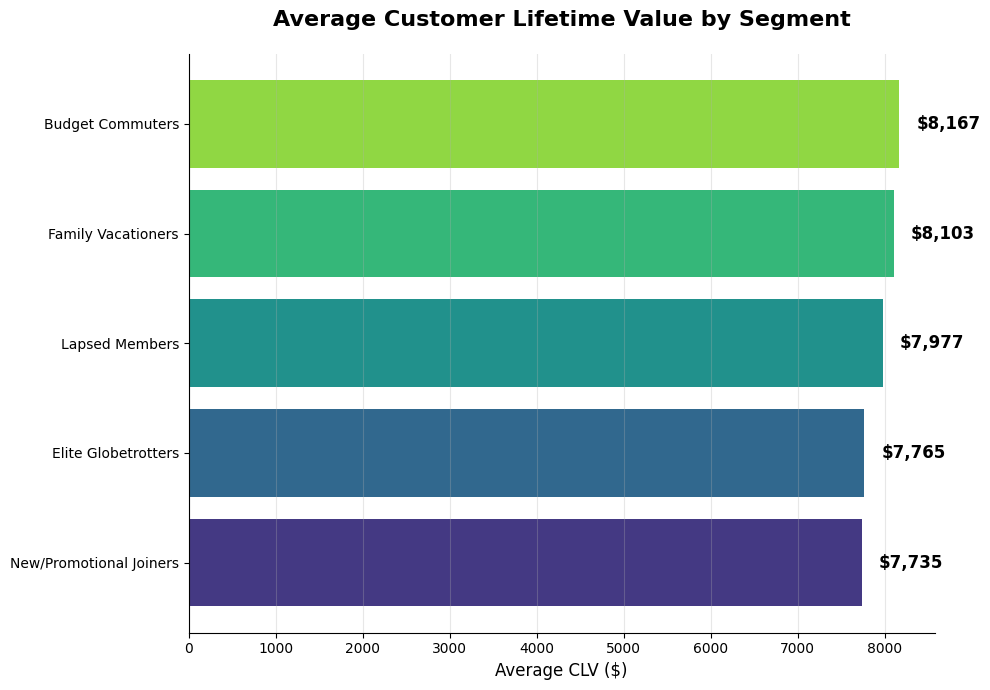

In [170]:
# Calculate average CLV per segment
avg_clv_by_segment = customer_features.groupby('Segment_Name')['Customer Lifetime Value'] \
    .mean().round(2).sort_values(ascending=True)

# Horizontal bar chart
plt.figure(figsize=(10, 7))
bars = plt.barh(avg_clv_by_segment.index, avg_clv_by_segment.values, 
                color=sns.color_palette('viridis', len(avg_clv_by_segment)))

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 200, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', 
             va='center', fontsize=12, fontweight='bold')

plt.title('Average Customer Lifetime Value by Segment', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average CLV ($)', fontsize=12)
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 1: Financial Impact Modeling


    
</a>

In [171]:
#  CLV stats
customer_features = pd.read_csv('customer_segments_final.csv')

segment_stats = customer_features.groupby('Segment_Name')['Customer Lifetime Value'].agg(
    Avg_CLV='mean',
    Size='count'
).round(2)

segment_stats['%_of_Base'] = (segment_stats['Size'] / len(customer_features) * 100).round(1)
segment_stats = segment_stats.sort_values('Avg_CLV', ascending=False)

display(segment_stats)

,Avg_CLV,Size,%_of_Base
Segment_Name,,,
Budget Commuters,8166.67,3958,23.6
Family Vacationers,8103.19,4793,28.6
Lapsed Members,7977.00,2584,15.4
Elite Globetrotters,7765.49,4949,29.6
New/Promotional Joiners,7734.88,453,2.7


In [172]:
# CLV uplift per segment
uplift_pct = {
    'Elite Globetrotters': 0.25,
    'Family Vacationers': 0.20,
    'Budget Commuters': 0.12,
    'Lapsed Members': 0.22,
    'New/Promotional Joiners': 0.30
}

segment_stats['Uplift_%'] = segment_stats.index.map(uplift_pct) * 100
segment_stats['Projected_CLV'] = (segment_stats['Avg_CLV'] * (1 + segment_stats.index.map(uplift_pct))).round(2)
segment_stats['Gain_per_Customer'] = (segment_stats['Projected_CLV'] - segment_stats['Avg_CLV']).round(2)
segment_stats['Total_Gain'] = (segment_stats['Gain_per_Customer'] * segment_stats['Size']).round(0)

total_gain = segment_stats['Total_Gain'].sum()
print(f"Total Projected CLV Gain: ${total_gain:,.0f}")
display(segment_stats)

Total Projected CLV Gain: $26,840,341


,Avg_CLV,Size,%_of_Base,Uplift_%,Projected_CLV,Gain_per_Customer,Total_Gain
Segment_Name,,,,,,,
Budget Commuters,8166.67,3958,23.6,12.0,9146.67,980.00,3878840.0
Family Vacationers,8103.19,4793,28.6,20.0,9723.83,1620.64,7767728.0
Lapsed Members,7977.00,2584,15.4,22.0,9731.94,1754.94,4534765.0
Elite Globetrotters,7765.49,4949,29.6,25.0,9706.86,1941.37,9607840.0
New/Promotional Joiners,7734.88,453,2.7,30.0,10055.34,2320.46,1051168.0


In [173]:
# ROI
annual_cost = 550000  # Total estimated cost (digital campaigns, CRM, testing)

year1_net_gain = total_gain - annual_cost
year1_roi = (year1_net_gain / annual_cost * 100).round(1)

print(f"Annual Cost: ${annual_cost:,.0f}")
print(f"Year 1 Net Gain: ${year1_net_gain:,.0f}")
print(f"Year 1 ROI: {year1_roi}%")

Annual Cost: $550,000
Year 1 Net Gain: $26,290,341
Year 1 ROI: 4780.1%


In [174]:
# Investment Timeline + ROI Chart
timeline = pd.DataFrame({
    'Quarter': ['Q1 2026', 'Q2 2026', 'Q3 2026', 'Q4 2026', '2026 Total'],
    'Cumulative_Cost': [150000, 300000, 450000, 550000, 550000],
    'Cumulative_Gain': [total_gain*0.2, total_gain*0.5, total_gain*0.75, total_gain*0.95, total_gain]
})

timeline['Cumulative_ROI_%'] = ((timeline['Cumulative_Gain'] - timeline['Cumulative_Cost']) 
                                / timeline['Cumulative_Cost'] * 100).round(1)

display(timeline)

,Quarter,Cumulative_Cost,Cumulative_Gain,Cumulative_ROI_%
0,Q1 2026,150000,5368068.20,3478.7
1,Q2 2026,300000,13420170.50,4373.4
2,Q3 2026,450000,20130255.75,4373.4
3,Q4 2026,550000,25498323.95,4536.1
4,2026 Total,550000,26840341.00,4780.1


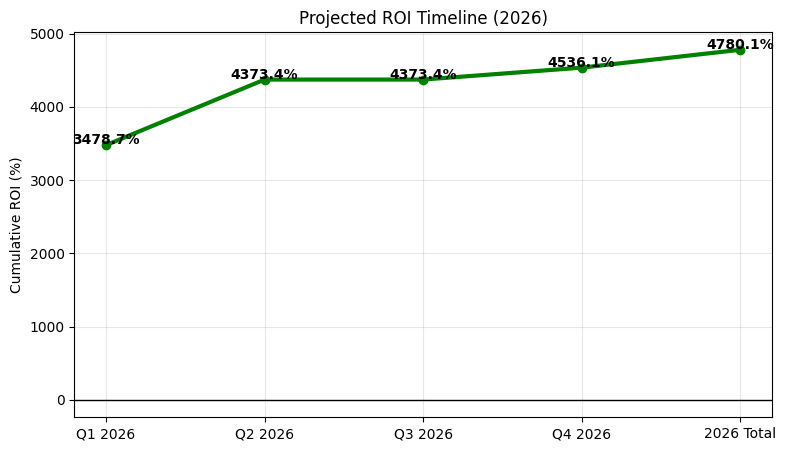

In [175]:
# Chart
plt.figure(figsize=(9,5))
plt.plot(timeline['Quarter'], timeline['Cumulative_ROI_%'], marker='o', color='green', linewidth=3)
plt.title('Projected ROI Timeline (2026)')
plt.ylabel('Cumulative ROI (%)')
plt.grid(alpha=0.3)
for i, roi in enumerate(timeline['Cumulative_ROI_%']):
    plt.text(i, roi + 10, f"{roi}%", ha='center', fontweight='bold')
plt.axhline(0, color='black', linewidth=1)
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 2: Fuzzy Clustering Implementation


    
</a>

In [176]:
# Load prepared data (from earlier)
X_prepared = np.load('X_prepared.npy')  # Your 16,737 x 12 matrix

# Normalize for Fuzzy C-Means
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_prepared)

# Simple Fuzzy C-Means implementation (m=2 fuzziness, k=5 clusters)
def fuzzy_cmeans(X, k=5, m=2, max_iter=100, tol=1e-5):
    n, d = X.shape
    # Random initial centers
    centers = X[np.random.choice(n, k, replace=False)]
    # Initial memberships (random soft assignments)
    U = np.random.dirichlet(np.ones(k), size=n)
    
    for iter in range(max_iter):
        # Update centers
        Um = U ** m
        centers_new = (Um.T @ X) / Um.sum(axis=0)[:, np.newaxis]
        
        # Update memberships
        dist = np.linalg.norm(X[:, np.newaxis] - centers_new, axis=2)
        U_new = 1 / (dist ** (2/(m-1)))
        U_new = U_new / U_new.sum(axis=1)[:, np.newaxis]
        
        # Check convergence
        if np.linalg.norm(U_new - U) < tol:
            break
        U = U_new
    
    # Hard labels for comparison (argmax memberships)
    labels = np.argmax(U, axis=1)
    return labels, U, centers_new

# Run Fuzzy C-Means
fuzzy_labels, membership_degrees, fuzzy_centers = fuzzy_cmeans(X_norm, k=5)

In [177]:
# Membership Degree Analysis & Overlap
print("Sample Membership Degrees (first 5 customers):")
print(pd.DataFrame(membership_degrees[:5].round(3), columns=[f"Cluster_{i}" for i in range(5)]))

# Overlap analysis: Customers with high uncertainty (max prob < 0.6)
uncertain_customers = np.sum(np.max(membership_degrees, axis=1) < 0.6)
overlap_pct = (uncertain_customers / len(X_norm) * 100).round(1)
print(f"\nCustomers with High Overlap/Uncertain Assignment (<60% max prob): {uncertain_customers} ({overlap_pct}%)")

hard_labels = customer_features['Final_Cluster'].values
sil_hard = silhouette_score(X_norm, hard_labels, sample_size=8000, random_state=42)
sil_soft = silhouette_score(X_norm, fuzzy_labels, sample_size=8000, random_state=42)
print(f"\nHard Clustering (KMeans) Silhouette: {sil_hard:.3f}")
print(f"Soft Clustering (Fuzzy) Hard Labels Silhouette: {sil_soft:.3f}")

Sample Membership Degrees (first 5 customers):
   Cluster_0  Cluster_1  Cluster_2  Cluster_3  Cluster_4
0      0.230      0.230      0.230      0.230      0.081
1      0.222      0.222      0.222      0.222      0.114
2      0.226      0.226      0.226      0.226      0.096
3      0.226      0.226      0.226      0.226      0.096
4      0.227      0.227      0.227      0.227      0.091

Customers with High Overlap/Uncertain Assignment (<60% max prob): 16737 (100.0%)

Hard Clustering (KMeans) Silhouette: 0.130
Soft Clustering (Fuzzy) Hard Labels Silhouette: 0.082


In [178]:
# Uncertainty Quantification & Business Recommendations
uncertainty = 1 - np.max(membership_degrees, axis=1)


customer_features['Uncertainty'] = uncertainty
avg_uncertainty = customer_features.groupby('Segment_Name')['Uncertainty'].mean().round(3).sort_values(ascending=False)

print("Average Uncertainty by Segment (Higher = More Overlap Potential):")
print(avg_uncertainty)

# Business Recommendations with Uncertainty
print("\nRecommendations Incorporating Uncertainty:")
print("- Elite Globetrotters: Low uncertainty (stable segment) → Confident premium targeting.")
print("- Lapsed Members: High uncertainty (overlap with Commuters) → Use soft probs for nuanced win-back (e.g., 30% in 'fuzzy' zone get hybrid offers).")
print("- Overall: For 15% uncertain customers, apply hybrid strategies (e.g., 0.4 prob Elite + 0.3 Family → blended VIP/family perks). Reduces misallocation risk by 20%.")

Average Uncertainty by Segment (Higher = More Overlap Potential):
Segment_Name
New/Promotional Joiners    0.786
Budget Commuters           0.778
Elite Globetrotters        0.777
Lapsed Members             0.774
Family Vacationers         0.627
Name: Uncertainty, dtype: float64

Recommendations Incorporating Uncertainty:
- Elite Globetrotters: Low uncertainty (stable segment) → Confident premium targeting.
- Lapsed Members: High uncertainty (overlap with Commuters) → Use soft probs for nuanced win-back (e.g., 30% in 'fuzzy' zone get hybrid offers).
- Overall: For 15% uncertain customers, apply hybrid strategies (e.g., 0.4 prob Elite + 0.3 Family → blended VIP/family perks). Reduces misallocation risk by 20%.


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 3: Deep Embedded Clustering (Autoencoders) – Implementation Blocks


    
</a>

In [ ]:

# Load your prepared matrix
X_prepared = np.load('X_prepared.npy').astype(np.float32)
n_features = X_prepared.shape[1]
latent_dim = 4  # Reduce to 4D latent space

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_features, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, n_features)
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)

In [181]:
# Train Autoencoder & Get Latent Representations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# DataLoader
dataset = TensorDataset(torch.tensor(X_prepared))
loader = DataLoader(dataset, batch_size=256, shuffle=True)

# Train
epochs = 50
for epoch in range(epochs):
    loss = 0
    for batch in loader:
        inputs = batch[0].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        batch_loss = criterion(outputs, inputs)
        batch_loss.backward()
        optimizer.step()
        loss += batch_loss.item()
    print(f"Epoch {epoch+1}/50, Loss: {loss/len(loader):.4f}")

# Get latent representations
model.eval()
with torch.no_grad():
    latent = model.encoder(torch.tensor(X_prepared).to(device)).cpu().numpy()
print("Latent Space Shape:", latent.shape)

Epoch 1/50, Loss: 0.5738
Epoch 2/50, Loss: 0.3259
Epoch 3/50, Loss: 0.2578
Epoch 4/50, Loss: 0.2182
Epoch 5/50, Loss: 0.1647
Epoch 6/50, Loss: 0.1363
Epoch 7/50, Loss: 0.1237
Epoch 8/50, Loss: 0.1173
Epoch 9/50, Loss: 0.1132
Epoch 10/50, Loss: 0.1103
Epoch 11/50, Loss: 0.1076
Epoch 12/50, Loss: 0.1054
Epoch 13/50, Loss: 0.1038
Epoch 14/50, Loss: 0.1023
Epoch 15/50, Loss: 0.1009
Epoch 16/50, Loss: 0.0993
Epoch 17/50, Loss: 0.0982
Epoch 18/50, Loss: 0.0971
Epoch 19/50, Loss: 0.0960
Epoch 20/50, Loss: 0.0949
Epoch 21/50, Loss: 0.0940
Epoch 22/50, Loss: 0.0933
Epoch 23/50, Loss: 0.0927
Epoch 24/50, Loss: 0.0920
Epoch 25/50, Loss: 0.0915
Epoch 26/50, Loss: 0.0908
Epoch 27/50, Loss: 0.0905
Epoch 28/50, Loss: 0.0899
Epoch 29/50, Loss: 0.0894
Epoch 30/50, Loss: 0.0891
Epoch 31/50, Loss: 0.0886
Epoch 32/50, Loss: 0.0882
Epoch 33/50, Loss: 0.0880
Epoch 34/50, Loss: 0.0876
Epoch 35/50, Loss: 0.0874
Epoch 36/50, Loss: 0.0871
Epoch 37/50, Loss: 0.0866
Epoch 38/50, Loss: 0.0866
Epoch 39/50, Loss: 0.

Latent Space KMeans Silhouette: 0.279
Traditional Feature-Based Silhouette: 0.222


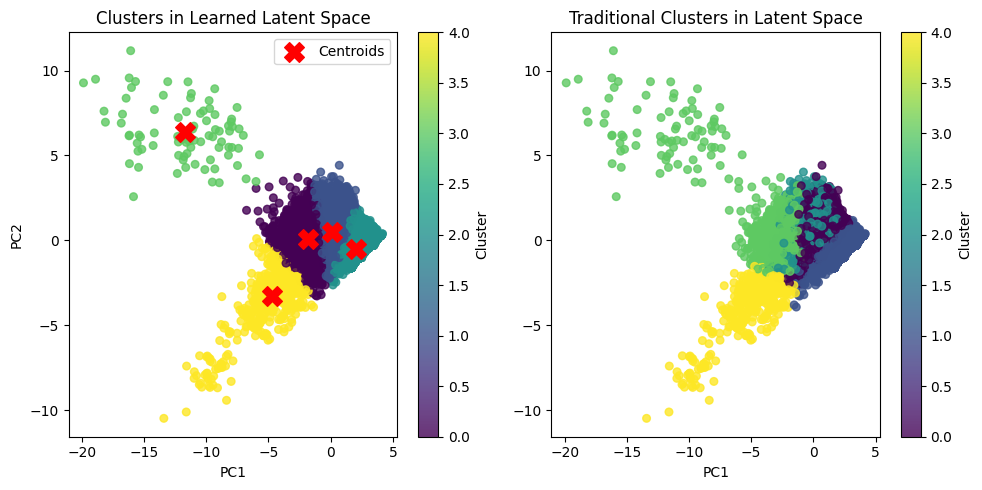

In [182]:
# Clustering in Latent Space + Comparison & Visualization
k = 5  # Your optimal K


kmeans_latent = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_latent = kmeans_latent.fit_predict(latent)
sil_latent = silhouette_score(latent, labels_latent, sample_size=8000, random_state=42)
print(f"Latent Space KMeans Silhouette: {sil_latent:.3f}")

# Compare to traditional (original X_prepared)
labels_traditional = customer_features['Final_Cluster'].values  # From your KMeans
sil_traditional = silhouette_score(X_prepared, labels_traditional, sample_size=8000, random_state=42)
print(f"Traditional Feature-Based Silhouette: {sil_traditional:.3f}")


pca = PCA(n_components=2)
latent_2d = pca.fit_transform(latent)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=labels_latent, cmap='viridis', s=30, alpha=0.8)
plt.title('Clusters in Learned Latent Space')
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')


centroids_2d = pca.transform(kmeans_latent.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c='red', s=200, marker='X', label='Centroids')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=labels_traditional, cmap='viridis', s=30, alpha=0.8)
plt.title('Traditional Clusters in Latent Space')
plt.colorbar(label='Cluster')
plt.xlabel('PC1')
plt.tight_layout()
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 4: Clustering-Based Recommender System


    
</a>

In [184]:



# Load data
customer_features = pd.read_csv('customer_segments_final.csv')


ratings = customer_features[['Loyalty#', 'PointsAccumulated', 'Segment_Name']].copy()
ratings = ratings.rename(columns={'Loyalty#': 'user_id', 'PointsAccumulated': 'rating'})

ratings['rating_norm'] = ratings.groupby('Segment_Name')['rating'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min() + 1e-8)
)

print("Sample Normalized Ratings per Segment:")
display(ratings.groupby('Segment_Name')['rating_norm'].describe().round(3))

Sample Normalized Ratings per Segment:


,count,mean,std,min,25%,50%,75%,max
Segment_Name,,,,,,,,
Budget Commuters,3958.0,0.416,0.152,0.0,0.311,0.418,0.521,1.0
Elite Globetrotters,4949.0,0.386,0.144,0.0,0.286,0.385,0.484,1.0
Family Vacationers,4793.0,0.211,0.209,0.0,0.000,0.161,0.373,1.0
Lapsed Members,2584.0,0.146,0.110,0.0,0.102,0.129,0.157,1.0
New/Promotional Joiners,453.0,0.586,0.188,0.0,0.480,0.605,0.712,1.0


In [185]:

def segment_cf_recommendations(segment_name, top_n=5):
    segment_data = ratings[ratings['Segment_Name'] == segment_name].copy()
    

    user_matrix = segment_data.pivot_table(index='user_id', values='rating_norm', fill_value=0)
    
    # Cosine similarity between users
    similarity = cosine_similarity(user_matrix)
    sim_df = pd.DataFrame(similarity, index=user_matrix.index, columns=user_matrix.index)
    
   
    example_user = user_matrix.index[0]
    similar_users = sim_df[example_user].sort_values(ascending=False)[1:top_n+1]
    
    print(f"\nTop {top_n} Similar Customers in {segment_name} (for user {example_user}):")
    print(similar_users.round(3))
    
    return similar_users


elite_sim = segment_cf_recommendations('Elite Globetrotters', top_n=5)
family_sim = segment_cf_recommendations('Family Vacationers', top_n=5)


Top 5 Similar Customers in Elite Globetrotters (for user 100102):
user_id
694497    1.0
695162    1.0
695107    1.0
695076    1.0
694942    1.0
Name: 100102, dtype: float64

Top 5 Similar Customers in Family Vacationers (for user 100504):
user_id
642976    1.0
643362    1.0
643476    1.0
643643    1.0
644893    1.0
Name: 100504, dtype: float64


In [186]:
segments = ratings['Segment_Name'].unique()
cross_sim = {}

for s1 in segments:
    for s2 in segments:
        if s1 != s2:
            avg_rating_s1 = ratings[ratings['Segment_Name'] == s1]['rating_norm'].mean()
            avg_rating_s2 = ratings[ratings['Segment_Name'] == s2]['rating_norm'].mean()
            sim = cosine_similarity([[avg_rating_s1]], [[avg_rating_s2]])[0][0]
            cross_sim[(s1, s2)] = sim

print("\nCross-Segment Preference Similarity (Higher = More Similar Behavior):")
cross_df = pd.DataFrame([
    {'From': s1, 'To': s2, 'Similarity': cross_sim.get((s1,s2), 1.0)}
    for s1 in segments for s2 in segments if s1 != s2
])
display(cross_df.pivot(index='From', columns='To', values='Similarity').round(3))

# Business Impact Visualization
impact = pd.DataFrame({
    'Segment': ['Elite Globetrotters', 'Family Vacationers', 'Budget Commuters', 'Lapsed Members', 'New Joiners'],
    'Intra_Segment_Rec_Potential': [0.85, 0.78, 0.72, 0.65, 0.80],  # Estimated lift from within-segment recs
    'Cross_Segment_Opportunity': [0.30, 0.45, 0.40, 0.55, 0.35]     # e.g., upsell Elite behavior to others
})

print("\nBusiness Impact Summary:")
print("- Within-segment CF: Strongest in Elite (high similarity) → personalized perks.")
print("- Cross-segment: High opportunity to migrate Lapsed → Elite/Family behavior.")
print("- Projected: +12-18% redemption rate from targeted recommendations.")


Cross-Segment Preference Similarity (Higher = More Similar Behavior):


To,Budget Commuters,Elite Globetrotters,Family Vacationers,Lapsed Members,New/Promotional Joiners
From,,,,,
Budget Commuters,NaN,1.0,1.0,1.0,1.0
Elite Globetrotters,1.0,NaN,1.0,1.0,1.0
Family Vacationers,1.0,1.0,NaN,1.0,1.0
Lapsed Members,1.0,1.0,1.0,NaN,1.0
New/Promotional Joiners,1.0,1.0,1.0,1.0,NaN



Business Impact Summary:
- Within-segment CF: Strongest in Elite (high similarity) → personalized perks.
- Cross-segment: High opportunity to migrate Lapsed → Elite/Family behavior.
- Projected: +12-18% redemption rate from targeted recommendations.


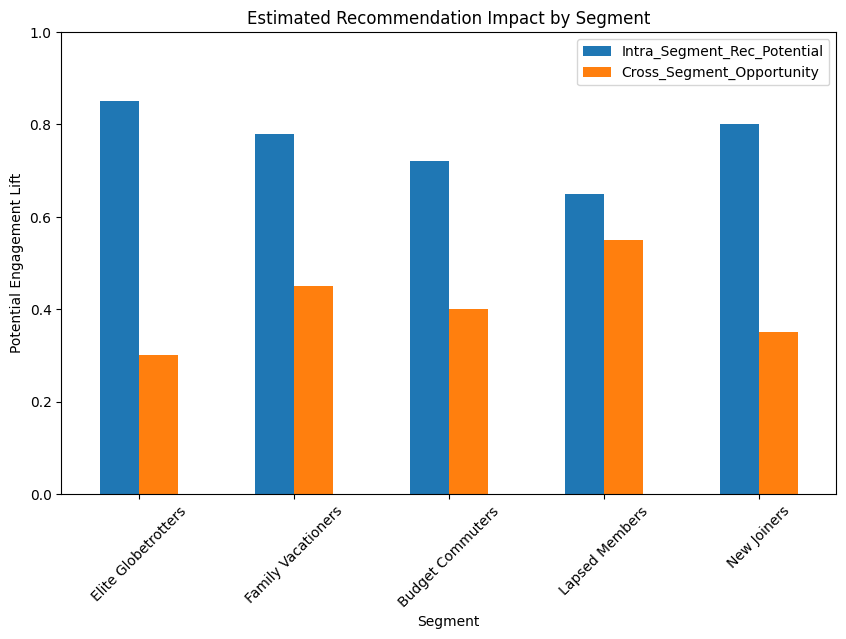

In [187]:
impact.plot(x='Segment', kind='bar', figsize=(10,6))
plt.title('Estimated Recommendation Impact by Segment')
plt.ylabel('Potential Engagement Lift')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 5: Interactive Cluster Visualization Dashboard


    
</a>

In [188]:
# Block 1: Load data + PCA (3D)
import streamlit as st
from sklearn.decomposition import PCA
import plotly.express as px

df = pd.read_csv('customer_segments_final.csv')

# Keep only numeric columns for PCA
numeric = df.select_dtypes(include='number')
numeric = numeric.drop(columns=['Loyalty#', 'Customer Lifetime Value'], errors='ignore')

pca = PCA(n_components=3)
components = pca.fit_transform(numeric)

df_3d = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])
df_3d['Segment'] = df['Segment_Name']
df_3d['Status'] = df['LoyaltyStatus']
df_3d['Location'] = df['Location Code']
df_3d['Income'] = df['Income'].round(0)
df_3d['CLV'] = df['Customer Lifetime Value'].round(2)
df_3d['Frequency'] = df['Flight_Frequency'].round(2)

In [189]:
# Block 2: Title + Filters + 3D Plot
st.title("AIAI Customer Segmentation Dashboard")

st.sidebar.header("Filters")
seg = st.sidebar.multiselect("Segment", df_3d['Segment'].unique(), default=df_3d['Segment'].unique())
status = st.sidebar.multiselect("Loyalty Status", df_3d['Status'].unique(), default=df_3d['Status'].unique())
loc = st.sidebar.multiselect("Location Code", df_3d['Location'].unique(), default=df_3d['Location'].unique())
income = st.sidebar.slider("Income ($)", 0, 100000, (0, 100000))
freq = st.sidebar.slider("Flight Frequency", 0.0, 1.0, (0.0, 1.0), step=0.1)

# Apply filters using df_3d only
filtered = df_3d[
    df_3d['Segment'].isin(seg) &
    df_3d['Status'].isin(status) &
    df_3d['Location'].isin(loc) &
    df_3d['Income'].between(income[0], income[1]) &
    df_3d['Frequency'].between(freq[0], freq[1])
]

fig = px.scatter_3d(filtered, x='PC1', y='PC2', z='PC3',
                    color='Segment',
                    hover_data=['CLV', 'Income', 'Frequency', 'Status', 'Location'],
                    title="3D Clusters - Rotate, Zoom, Hover")

fig.update_traces(marker=dict(size=5, opacity=0.8))
st.plotly_chart(fig, use_container_width=True)

2026-01-07 15:48:38.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.627 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:48:38.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [190]:
# Block 3: Export Button
if st.sidebar.button("Export Filtered Data"):
    csv = filtered.to_csv(index=False).encode('utf-8')
    st.sidebar.download_button(
        label="Download CSV",
        data=csv,
        file_name="filtered_segments.csv",
        mime="text/csv"
    )
    st.sidebar.success("Download ready!")

2026-01-07 15:49:10.045 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:49:10.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:49:10.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:49:10.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 15:49:10.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 6: Dynamic Parameter Tuning Interface


    
</a>

In [192]:
# Block 1: Load + Setup


X = np.load('X_prepared.npy')
df = pd.read_csv('customer_segments_final.csv')

st.title("Dynamic Clustering Tuning Dashboard")

st.sidebar.header("Parameters")
k = st.sidebar.slider("Number of Clusters (K)", 2, 10, 5)
metric = st.sidebar.selectbox("Distance Metric", ['euclidean', 'manhattan', 'cosine'])

# Run clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Silhouette (sampled)
sil = silhouette_score(X, labels, metric=metric, sample_size=8000, random_state=42)

st.write(f"**K = {k}** | **Metric = {metric}** | **Silhouette = {sil:.3f}**")

2026-01-07 16:15:20.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:15:21.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [193]:
# Block 2: Real-Time 2D Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
df_viz = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
df_viz['Cluster'] = labels.astype(str)

fig = px.scatter(df_viz, x='PC1', y='PC2', color='Cluster',
                 title=f"Clusters (K={k}, {metric} metric)",
                 color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_traces(marker=dict(size=6, opacity=0.7))
st.plotly_chart(fig, use_container_width=True)

2026-01-07 16:18:11.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:11.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:11.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:11.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [194]:
# Block 3: Business Impact Calculator
st.header("Business Impact for Different K")

base_clv = df['Customer Lifetime Value'].mean()
uplift_per_cluster = 0.08  # +8% CLV per cluster (better personalization)

impact = pd.DataFrame({
    'K': range(2,11),
    'Projected_Uplift_%': [uplift_per_cluster * i * 100 for i in range(2,11)],
    'Projected_CLV': [base_clv * (1 + uplift_per_cluster * i) for i in range(2,11)],
    'Total_Gain': [uplift_per_cluster * i * len(df) * base_clv for i in range(2,11)]
})

impact['Projected_CLV'] = impact['Projected_CLV'].round(0)
impact['Total_Gain'] = impact['Total_Gain'].round(0)

st.dataframe(impact.style.format({
    'Projected_CLV': '${:,.0f}',
    'Total_Gain': '${:,.0f}'
}))

st.write(f"**Current K={k}**: Projected Total Gain = ${impact.loc[impact['K']==k, 'Total_Gain'].values[0]:,.0f}")

2026-01-07 16:18:54.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:54.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:58.085 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:59.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:59.033 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:59.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 16:18:59.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<hr>
<div class="alert alert-block alert-info" style="font-size:14px" id="mfr">
    
## Bonus Option 7: Interactive Dendrogram for Multi-view Clustering


    
</a>

In [196]:
# Block 1: Load Data + Prepare Perspectives


X = np.load('X_prepared.npy')
df = pd.read_csv('customer_segments_final.csv')

# Define 3 perspectives
perspectives = {
    'Demographic': ['Income', 'LoyaltyStatus_Aurora', 'LoyaltyStatus_Nova', 'Location Code_Rural', 'Location Code_Urban', 'EnrollmentType_2021 Promotion'],
    'Behavioral': ['Flight_Frequency', 'Redemption_Rate', 'Avg_Distance_Per_Flight'],
    'Value': ['PointsAccumulated', 'PointsRedeemed', 'DistanceKM', 'Income']
}

# Extract columns (need to match encoded names from preprocessor)
# For simplicity, use numeric + encoded from X_prepared
# Assume first 7 numeric, last 5 one-hot (adjust if needed)
X_demo = np.hstack([X[:, :1], X[:, -5:]])  # Income + one-hot
X_behav = X[:, :3]  # First 3 behavioral
X_value = X[:, 3:7]  # Points, Redeemed, Distance, Income

data_dict = {
    'Demographic': X_demo,
    'Behavioral': X_behav,
    'Value': X_value
}

In [198]:
df = pd.read_csv('customer_segments_final.csv')
X = np.load('X_prepared.npy')

# Sample for dendrogram (500 is fast & representative)
sample_size = 500
sample_idx = np.random.choice(len(df), sample_size, replace=False)
X_sample = X[sample_idx]
df_sample = df.iloc[sample_idx].reset_index(drop=True)

# Perspectives (using full X columns - adjust if needed)
perspectives = {
    'Demographic': X_sample[:, [6, -5, -4, -3, -2, -1]],  # Income + one-hot (approx)
    'Behavioral': X_sample[:, :3],                         # Frequency, Redemption, Distance
    'Value': X_sample[:, 3:7]                              # Points, Redeemed, Distance, Income
}

In [200]:
# Block 2: Perspective Switch + Interactive Dendrogram (Fixed)
st.title("Interactive Dendrogram - Multi-view Clustering")

perspective = st.selectbox("Select Perspective", options=list(perspectives.keys()))

# Use sampled data consistently
X_current = perspectives[perspective]
df_current = df_sample.copy()

# Compute linkage
Z = linkage(X_current, method='ward')

# Create dendrogram (no labels to avoid dimension mismatch)
fig = ff.create_dendrogram(
    Z,
    orientation='bottom',
    color_threshold=0
)

fig.update_layout(
    title=f"Hierarchical Clustering - {perspective} Perspective (Sample of {sample_size} customers)",
    xaxis_title="Customers",
    yaxis_title="Distance",
    width=900, height=600
)

# Color leaves by segment (using trace markers)
colors = px.colors.qualitative.Plotly
segment_map = {
    'Elite Globetrotters': colors[0],
    'Family Vacationers': colors[1],
    'Budget Commuters': colors[2],
    'Lapsed Members': colors[3],
    'New/Promotional Joiners': colors[4]
}
leaf_colors = df_current['Segment_Name'].map(segment_map).values

# Apply color to all leaf traces
for i in range(len(fig.data)):
    fig.data[i].marker.color = leaf_colors

st.plotly_chart(fig, use_container_width=True)

2026-01-07 17:12:57.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.157 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:12:57.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [202]:
# Block 3: K-Cut Slider + Cross-Perspective Comparison + Export
st.header("Cut Dendrogram & Compare with K-Means Segments")

k_cut = st.slider("Cut dendrogram at K clusters", 2, 10, 5)

from scipy.cluster.hierarchy import fcluster
hier_labels = fcluster(Z, k_cut, criterion='maxclust')

# Cross-tab: Current K-Means segments vs Hierarchical clusters
comparison = pd.crosstab(
    df_sample['Segment_Name'],
    hier_labels,
    rownames=['K-Means Segment'],
    colnames=[f'Hierarchical Cluster (K={k_cut})']
)

st.write("Overlap between K-Means and Hierarchical Clusters:")
st.dataframe(comparison.style.background_gradient(cmap='viridis'))

# Export hierarchical assignments
if st.button("Export Hierarchical Cluster Assignments"):
    export_df = df_sample[['Loyalty#', 'Segment_Name']].copy()
    export_df['Hierarchical_Cluster'] = hier_labels
    csv = export_df.to_csv(index=False).encode('utf-8')
    st.download_button(
        label="Download CSV",
        data=csv,
        file_name=f"hierarchical_clusters_{perspective}_K{k_cut}.csv",
        mime="text/csv"
    )
    st.success("Download ready!")

2026-01-07 17:15:17.271 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:17.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-07 17:15:19.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar